In [1]:
%load_ext autoreload
%autoreload 2
import data
import data_prepro as pre 
import pandas as pd
from datetime import timedelta
import matplotlib.pyplot as plt
import scienceplots
from pathlib import Path
import portfolio_trade as pt
import dm_test
# from rfi_table_generator import generate_rfi_latex_table

Resolved STOCK_DATA_PATH: /Users/minhquangngo/Documents/vsc/erasmus/msc_thesis/data/stock_ff_sector.parquet
Resolved VIX_DATA_PATH: /Users/minhquangngo/Documents/vsc/erasmus/msc_thesis/data/vix_data.parquet
Resolved SENTIMENT_DATA_PATH: /Users/minhquangngo/Documents/vsc/erasmus/msc_thesis/data/sentiment_ung.csv
Resolved SENTIMENT_DATA_PATH: /Users/minhquangngo/Documents/vsc/erasmus/msc_thesis/data/news_sentiment_data.csv


/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pydantic/_internal/_config.py:323: PydanticDeprecatedSince20: Support for class-based `config` is deprecated, use ConfigDict instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  warnings.warn(DEPRECATION_MESSAGE, DeprecationWarning)


In [2]:
df = data.load_process()

Loading stock parquet


/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(


Loading VIX parquet.


/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(


In [3]:
df.columns

Index(['permno', 'ticker', 'vol', 'ret', 'shrout', 'prc', 'askhi', 'bidlo',
       'gsector', 'mktrf', 'smb', 'hml', 'rmw', 'umd', 'cma', 'rf',
       'mbrstartdt', 'mbrenddt', 'put_volume', 'call_volume', 'put_call_ratio',
       'gsector_name', 'Enhanced Investor Sentiment Index (STV)', 'vix_close',
       'News Sentiment'],
      dtype='object')

In [4]:
!pwd

/opt/anaconda3/envs/mscthesis/lib/python3.12/pty.py:95: DeprecationWarning: This process (pid=91090) is multi-threaded, use of forkpty() may lead to deadlocks in the child.
  pid, fd = os.forkpty()


/Users/minhquangngo/Documents/vsc/erasmus/msc_thesis/py


In [5]:
%cd ..

/Users/minhquangngo/Documents/vsc/erasmus/msc_thesis


In [6]:
data_dir = Path.cwd()/'data'

df_dict = {
    file.stem.replace("sector_","") : pd.read_parquet(file)
    for file in data_dir.glob("sector_*.parquet")
}

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/co

In [7]:
df_dict['10'].tail(50)

,vol,ret,shrout,prc,askhi,bidlo,put_volume,call_volume,put_call_ratio,vix_close,...,enhanced_baker,news_sent,mktcap,turn_sd,sect_mktcap,mvel1,dolvol,daily_illq,excess_ret,excess_mkt_ret
index,,,,,,,,,,,,,,,,,,,,,
2018-10-17,7.090816e+06,-0.006811,1.790268e+06,82.103614,82.844743,81.218036,5257.450597,9271.779058,0.738169,17.400000,...,1.677,0.03,1.475542e+08,3.072879,1.469875e+08,18.809706,5.821816e+08,1.169872e-05,-0.006891,-0.00088
2018-10-18,9.135598e+06,-0.004694,1.799754e+06,81.919688,82.662846,81.060460,7247.380047,14073.035953,0.803405,20.059999,...,1.677,0.02,1.486415e+08,3.072879,1.474353e+08,18.817048,7.483854e+08,6.271510e-06,-0.004774,-0.01548
2018-10-19,8.483855e+06,-0.007025,1.813272e+06,81.210296,82.805008,80.770177,9356.581814,13284.470162,0.809722,19.889999,...,1.677,-0.01,1.497707e+08,3.072879,1.472564e+08,18.824616,6.889764e+08,1.019680e-05,-0.007105,-0.00258
2018-10-22,6.825382e+06,-0.011078,1.813387e+06,80.534156,81.618499,79.809177,5923.296388,10345.804992,0.831708,19.639999,...,1.677,0.00,1.484687e+08,3.072879,1.460396e+08,18.815885,5.496764e+08,2.015399e-05,-0.011158,-0.00388
2018-10-23,9.712357e+06,-0.026617,1.821805e+06,78.276509,79.388233,76.988453,10144.860877,17747.840518,0.586361,20.709999,...,1.677,-0.01,1.456699e+08,3.072879,1.426045e+08,18.796854,7.602494e+08,3.501068e-05,-0.026697,-0.00628
2018-10-24,1.029028e+07,-0.037594,1.834264e+06,75.423177,78.905061,75.282592,9503.541755,19322.373138,0.623939,25.230000,...,1.677,0.00,1.422711e+08,3.072879,1.383460e+08,18.773245,7.761257e+08,4.843839e-05,-0.037674,-0.03338
2018-10-25,8.117874e+06,0.011599,1.832241e+06,76.491694,77.563637,75.648372,8404.785245,11966.378354,1.098704,24.219999,...,1.677,-0.01,1.437202e+08,3.072879,1.401512e+08,18.783379,6.209500e+08,1.868014e-05,0.011519,0.01922
2018-10-26,1.069092e+07,-0.007505,1.832931e+06,76.014522,77.041966,74.575708,8527.553713,10198.959978,0.853735,24.160000,...,1.677,-0.01,1.428546e+08,3.072879,1.393294e+08,18.777338,8.126652e+08,9.235131e-06,-0.007585,-0.01658
2018-10-29,9.453560e+06,-0.018507,1.844366e+06,74.526563,76.830017,73.560570,8728.831942,8719.024538,0.958609,24.700001,...,1.677,0.02,1.417949e+08,3.072879,1.374543e+08,18.769892,7.045414e+08,2.626841e-05,-0.018587,-0.00778


In [8]:
sp500ret = pd.read_csv('/Users/minhquangngo/documents/vsc/erasmus/msc_thesis/data/sp500daily_ret_2018.csv')

In [9]:
sp500ret = sp500ret.iloc[:-1, :]
sp500ret.shape

(250, 2)

In [ ]:
sp500ret.shape

In [10]:
sp500ret.index = pd.to_datetime(sp500ret['DlyCalDt'])
sp500ret = sp500ret.drop(columns=['DlyCalDt'])
sp500ret.head()

,sprtrn
DlyCalDt,
2018-01-02,0.008303
2018-01-03,0.006399
2018-01-04,0.004029
2018-01-05,0.007034
2018-01-08,0.001662


Unconstrained

In [ ]:
weighted_portfolio_returns = pt.weighted_portfolio_returns(weight_mode = 'unconstrained',return_type= 'ret')._weighted_portfolios()

In [ ]:
weighted_portfolio_excess = pt.weighted_portfolio_returns(weight_mode = 'unconstrained',return_type= 'excess_ret')._weighted_portfolios()

Constrained

In [ ]:
weighted_portfolio_returns = pt.weighted_portfolio_returns(weight_mode = 'constrained',return_type= 'ret')._weighted_portfolios()

In [ ]:
weighted_portfolio_excess = pt.weighted_portfolio_returns(weight_mode = 'constrained',return_type= 'excess_ret')._weighted_portfolios()

Equal weight

In [11]:
weighted_portfolio_returns = pt.weighted_portfolio_returns(weight_mode = 'equal_weight',return_type= 'ret')._weighted_portfolios()

Data directory: data
Experiments found: ['882624347748292247', '816231025914231740', '468973451922201767', '311565507127226983', '817788886064538782', '247451233100636997', '378770976445258889', '282669454988538500']
Model spec path: mlruns/882624347748292247/meta.yaml
Current working directory: /Users/minhquangngo/Documents/vsc/erasmus/msc_thesis
Meta content for 882624347748292247: {'artifact_location': 'mlflow-artifacts:/882624347748292247', 'creation_time': 1750692863931, 'experiment_id': '882624347748292247', 'last_update_time': 1750692863931, 'lifecycle_stage': 'active', 'name': 'enhanced_ols_c4f_arl'}
Model spec path: mlruns/816231025914231740/meta.yaml
Current working directory: /Users/minhquangngo/Documents/vsc/erasmus/msc_thesis
Meta content for 816231025914231740: {'artifact_location': 'mlflow-artifacts:/816231025914231740', 'creation_time': 1750691701929, 'experiment_id': '816231025914231740', 'last_update_time': 1750691701929, 'lifecycle_stage': 'active', 'name': 'baseline

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/co

Sectors loaded: 20_rf_enhanced
Signal sector path: mlruns/282669454988538500/fe414ff88ac34952aa4a3bf1bd01aa11/params/sector
Sectors loaded: 25_rf_enhanced
Signal sector path: mlruns/282669454988538500/cc1d291b063c4ace8c6917f38bf46c03/params/sector
Sectors loaded: 45_rf_enhanced
Signal sector path: mlruns/282669454988538500/26732050f9aa4efebf91584b4fda0a32/params/sector
Sectors loaded: 55_rf_enhanced
Signal sector path: mlruns/282669454988538500/f3aec184525e4c80ad995a11f2bc261f/params/sector
Sectors loaded: 40_rf_enhanced
Signal sector path: mlruns/282669454988538500/1adc2ceaa04c4ea398eeffebde7e09bc/params/sector
Sectors loaded: 10_rf_enhanced
Signal sector path: mlruns/282669454988538500/c8ccc19f1e8d4d3c92e7d9c09ab35128/params/sector
Sectors loaded: 15_rf_enhanced
Signal sector path: mlruns/282669454988538500/5fa9f1f323644123acc0b4a2f62d93e5/params/sector
Sectors loaded: 60_rf_enhanced
Signal sector path: mlruns/282669454988538500/3d55e6a933a347359d45d0ccceb1c612/params/sector
Sectors 

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/co

run: [{'52193c07bb704f228697e97f6a775472': '35_enhanced'}, {'8a09c3a806dd42229602417f140f1a4f': '45_enhanced'}, {'dfd0bb8f999a446b9d436770099fc239': '10_enhanced'}, {'dea5fbe19789410491aa7af96fb97eb6': '15_enhanced'}, {'026d7d2b7e4943aba57c3fc457c43486': '20_enhanced'}, {'67e6ad51f7cf44d7a95b8bbca6b81c67': '50_enhanced'}, {'6ae144df695849deb8c0833e4d302d79': '30_enhanced'}, {'ed25eab9c1df4ae7b289e85a49c4a6b7': '25_enhanced'}, {'e13a2a0f1ab6479180432f04ee8e94d6': '60_enhanced'}, {'9e097f1b86fd4dc4bca50244473909b0': '55_enhanced'}, {'eb27d9cd6fca4c838ccf1376c8129a8f': '40_enhanced'}]




run: [{'e0cfc3f61e2747bea0c1bc8fd9753997': '30_rf'}, {'4b624d9d8a6441c69ca6bbf5bbec8a83': '20_rf'}, {'b8654182193a48539200844c8ddfd623': '55_rf'}, {'5d91856b4b744d0ca192ebb3223a6c13': '10_rf'}, {'af5f2228ed7d49838c73fbdb84777f4b': '25_rf'}, {'01d921dd355947199e816e124fca0e35': '60_rf'}, {'aa9213574fdb45938c2c69f46c15b730': '50_rf'}, {'b759f3ae2cc34794b8ba254d87104d9e': '35_rf'}, {'f3819901567847bba696fe4

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/co

Feature type determined: c4f
Renamed signal column 'signal' to 'rf_enhanced_c4f_signal'
Experiments found: ['882624347748292247', '816231025914231740', '468973451922201767', '311565507127226983', '817788886064538782', '247451233100636997', '378770976445258889', '282669454988538500']
Model spec path: mlruns/882624347748292247/meta.yaml
Current working directory: /Users/minhquangngo/Documents/vsc/erasmus/msc_thesis
Meta content for 882624347748292247: {'artifact_location': 'mlflow-artifacts:/882624347748292247', 'creation_time': 1750692863931, 'experiment_id': '882624347748292247', 'last_update_time': 1750692863931, 'lifecycle_stage': 'active', 'name': 'enhanced_ols_c4f_arl'}
Model spec path: mlruns/816231025914231740/meta.yaml
Current working directory: /Users/minhquangngo/Documents/vsc/erasmus/msc_thesis
Meta content for 816231025914231740: {'artifact_location': 'mlflow-artifacts:/816231025914231740', 'creation_time': 1750691701929, 'experiment_id': '816231025914231740', 'last_update_t

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/co

Feature type determined: c4f
Renamed signal column 'signal' to 'ols_base_c4f_signal'


sector_and_run: {'ff1bfc28d1f04a32b5df31f1b56fe5b5': '20_rf'}
We are now on experiment468973451922201767
We are now on experiment468973451922201767
We are now on experiment468973451922201767
Signal ml artifact path: mlartifacts/311565507127226983/ff1bfc28d1f04a32b5df31f1b56fe5b5/artifacts
Signal csv path: mlartifacts/311565507127226983/ff1bfc28d1f04a32b5df31f1b56fe5b5/artifacts/rf_signal_*.csv
Feature type determined: ff5
Renamed signal column 'signal' to 'rf_base_ff5_signal'


sector_and_run: {'7ab6f1738b6442219d49777164148ef0': '20_rf'}
We are now on experiment311565507127226983
We are now on experiment311565507127226983
We are now on experiment311565507127226983
We are now on experiment311565507127226983
Signal ml artifact path: mlartifacts/817788886064538782/7ab6f1738b6442219d49777164148ef0/artifacts
Signal csv path: mlartifacts/817788886064538782/7ab6f1738b6442219d49777164148ef0/artifacts/rf_sig

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the re

Sectors loaded: 35_rf_enhanced
Data sector path: py/mlruns/663281832130109338/5e2b107b3f5c4e6097758a27fb90e9c0/params/sector
Sectors loaded: 45_rf_enhanced
Data sector path: py/mlruns/663281832130109338/14d696fbe6a74e568204739d2583eb4e/params/sector
Sectors loaded: 30_rf_enhanced
Data sector path: py/mlruns/663281832130109338/5451a961b19045b995511497ad5db615/params/sector
Sectors loaded: 20_rf_enhanced
Data sector path: py/mlruns/663281832130109338/0c76ab0da6b442359118dfcb9aa8ad8a/params/sector
Sectors loaded: 60_rf_enhanced
Data sector path: py/mlruns/556603403257092514/d3d7baa0754d43c7bc141c2267d27336/params/sector
Sectors loaded: 45_enhanced
Data sector path: py/mlruns/556603403257092514/ab78abd8e8c649208d071eb20fd04828/params/sector
Sectors loaded: 50_enhanced
Data sector path: py/mlruns/556603403257092514/631d31fae9f24734a85753d68cd3b973/params/sector
Sectors loaded: 10_enhanced
Data sector path: py/mlruns/556603403257092514/7b09f4a2e8784aedba93b53a41604e8e/params/sector
Sectors l

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/co

Feature type determined: c4f
Renamed signal column 'signal' to 'ols_enhanced_c4f_signal'


sector_and_run: {'f6ac1b1851154e458425b0ddaf1cfb9f': '25_baseline'}
We are now on experiment882624347748292247
Signal ml artifact path: mlartifacts/816231025914231740/f6ac1b1851154e458425b0ddaf1cfb9f/artifacts
Signal csv path: mlartifacts/816231025914231740/f6ac1b1851154e458425b0ddaf1cfb9f/artifacts/ols_signal_*.csv
Feature type determined: ff5
Renamed signal column 'signal' to 'ols_base_ff5_signal'


sector_and_run: {'eccef9dafa4c4b2c8f77b2c5341b3436': '25_baseline'}
We are now on experiment816231025914231740
We are now on experiment816231025914231740
Signal ml artifact path: mlartifacts/468973451922201767/eccef9dafa4c4b2c8f77b2c5341b3436/artifacts
Signal csv path: mlartifacts/468973451922201767/eccef9dafa4c4b2c8f77b2c5341b3436/artifacts/ols_signal_*.csv
Feature type determined: c4f
Renamed signal column 'signal' to 'ols_base_c4f_signal'


sector_and_run: {'e38a16d6471644c081ccf7b5fd37a09e': '25

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the re

run: [{'c1d7537667164e0cb79385304d83e27e': '663281832130109338_e621d55c19054eaf956425d65c46993d'}, {'51053c4a5f9a4a409f7715ab8049b91f': '663281832130109338_23fc18926563489d938a728ded8fbabd'}, {'ef8456ad5db44de2a8ba96764989a85b': '663281832130109338_03956fb26ed54048821146aa7f3ce435'}, {'c5096d70020c44d4bff8968272d2cf3a': '663281832130109338_5e2b107b3f5c4e6097758a27fb90e9c0'}, {'0ad6a3d993e143448c8ab436b2f2610b': '663281832130109338_5451a961b19045b995511497ad5db615'}, {'4b77b63b8a054ef1bb8f7c1f586ff5a1': '663281832130109338_587d9501fd3b4e448f8016a38313af74'}, {'b7e887156de54641999dcc8f2540e4e9': '663281832130109338_5f81a7f91e1a4e3ea9551e952bf4279a'}, {'5e97ee700e1b4c4c8512035e9c35a54e': '663281832130109338_556ab09491dd4049919c8be557a56767'}, {'6a912d63e54d4621921351ae321f2ab4': '663281832130109338_0c76ab0da6b442359118dfcb9aa8ad8a'}, {'69bfbbb016d0431fa594657ab603ad8c': '663281832130109338_14d696fbe6a74e568204739d2583eb4e'}, {'1e7dbb0832f64b3e99c05a6f3dd41f6e': '663281832130109338_958f291

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the re

run: [{'d284276b82894415a231156c121d1479': '412880949699495685_e0cfc3f61e2747bea0c1bc8fd9753997'}, {'93467a3e71d64bd492c2f4ee792d45d9': '412880949699495685_5c4d1559384347439c56dd859086b2b3'}, {'e38a16d6471644c081ccf7b5fd37a09e': '412880949699495685_af5f2228ed7d49838c73fbdb84777f4b'}, {'90e4560eab6a4461b578a4044d64413e': '412880949699495685_b759f3ae2cc34794b8ba254d87104d9e'}, {'d10c993dbee14cf3862ff4775f9d092d': '412880949699495685_aa9213574fdb45938c2c69f46c15b730'}, {'21069418d54a4b11bbbd81d27797e307': '412880949699495685_b8654182193a48539200844c8ddfd623'}, {'f7499b6b97e94d128760c8d3d7bbf1df': '412880949699495685_f3819901567847bba696fe49477ffb90'}, {'ff1bfc28d1f04a32b5df31f1b56fe5b5': '412880949699495685_4b624d9d8a6441c69ca6bbf5bbec8a83'}, {'1f33ff210627424696f737c922603f59': '412880949699495685_01d921dd355947199e816e124fca0e35'}, {'593de3ec6401482aaad619ccec7c4402': '412880949699495685_6a0948d947bd479b826d5b8d4363269f'}, {'6a3dfca321be412d979adeb1517fc2ca': '412880949699495685_5d91856

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the re

run: [{'268d07a3a63e4b569e0c3ef101985a3f': '556603403257092514_b02f9e6c6c14446eb883fee4d7c1b822'}, {'d28380f521dc4b599fb1643c6e7ba478': '556603403257092514_d3d7baa0754d43c7bc141c2267d27336'}, {'e60a05c03c864d3296cc8a50d4a1a7a1': '556603403257092514_e372b0abfd8c4f1283cb1474caf14e2b'}, {'55a4b752687042fd859a1778325f4363': '556603403257092514_4f8d6fcba59a4af099a8570975b2d7ca'}, {'3d59ed7b0e284c9cab2b0714589201c1': '556603403257092514_7b09f4a2e8784aedba93b53a41604e8e'}, {'c192639fe0474c92a6c9a49c35faaf07': '556603403257092514_631d31fae9f24734a85753d68cd3b973'}, {'ea41cef3e48649c898c59bc984f8d2b4': '556603403257092514_52913e7e6a34405b80eeb6150a408997'}, {'c81a2f5a80bc4fc9ae74c8a406ca554d': '556603403257092514_ab78abd8e8c649208d071eb20fd04828'}, {'9e99c9c9f96241509097850cc4410786': '556603403257092514_9de4f42077514ca1917b8a0bfec9a06c'}, {'d8cf4a82a14442f8badb505cb3b89d27': '556603403257092514_c3e86675fe27494c9e1e0c24edaf253b'}, {'8b3fc19c43e04d9185a73bbcb20fca53': '556603403257092514_651f0a3

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/co

run: [{'bbba1985a30b4ca4b0c5e1705188efeb': '40_baseline'}, {'2464bdc194b345879e0c6c694db7eb26': '10_baseline'}, {'bb236c5e69d34c55a889c7c05589169c': '45_baseline'}, {'9d9468eabb714a53926ac43a2a01ac69': '25_baseline'}, {'3359015cf9ad4f85af79ca6649965b29': '50_baseline'}, {'98c0bd37c23d44c5ad95ef9d1de4f23a': '30_baseline'}, {'fbe07f78f6d245499282727e9fb5a0d4': '15_baseline'}, {'0d57e3dd1e43469b85f3c1fa7cb95223': '55_baseline'}, {'3d4109292cbb4d039b3f514023d8114c': '20_baseline'}, {'0e37b343f55249179e07332eb23fc908': '60_baseline'}, {'504c6881465c461eb22734a8ecf1c490': '35_baseline'}]




run: [{'6d83c93691924d9186d21afef0009308': '50_rf_enhanced'}, {'e7969fcdf4074188b0a3b652d2a8b008': '40_rf_enhanced'}, {'c9500e771c1e4f778bfd4ce5aed2a751': '25_rf_enhanced'}, {'739026fed0b2449081b3d635539f4785': '55_rf_enhanced'}, {'667fe5910f3c4a89b09d1ab40cc1be1d': '15_rf_enhanced'}, {'327508cb59774cf2b4ef4b70c58b0e76': '45_rf_enhanced'}, {'16c97c6b1ace4c7287756cd17743b836': '35_rf_enhanced'}, {'59ef0fa

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/co

Feature type determined: c4f
Renamed signal column 'signal' to 'rf_base_c4f_signal'


sector_and_run: {'f611f86a7bb14d7883b5c6eaf48d4617': '45_enhanced'}
We are now on experiment817788886064538782
We are now on experiment817788886064538782
We are now on experiment817788886064538782
We are now on experiment817788886064538782
We are now on experiment817788886064538782
Signal ml artifact path: mlartifacts/247451233100636997/f611f86a7bb14d7883b5c6eaf48d4617/artifacts
Signal csv path: mlartifacts/247451233100636997/f611f86a7bb14d7883b5c6eaf48d4617/artifacts/ols_signal_*.csv
Feature type determined: ff5
Renamed signal column 'signal' to 'ols_enhanced_ff5_signal'


sector_and_run: {'c5096d70020c44d4bff8968272d2cf3a': '45_rf_enhanced'}
We are now on experiment247451233100636997
We are now on experiment247451233100636997
We are now on experiment247451233100636997
We are now on experiment247451233100636997
We are now on experiment247451233100636997
We are now on experiment247451233100636997
Sign

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/co

Feature type determined: c4f
Renamed signal column 'signal' to 'ols_base_c4f_signal'


sector_and_run: {'d10c993dbee14cf3862ff4775f9d092d': '50_rf'}
We are now on experiment468973451922201767
We are now on experiment468973451922201767
We are now on experiment468973451922201767
Signal ml artifact path: mlartifacts/311565507127226983/d10c993dbee14cf3862ff4775f9d092d/artifacts
Signal csv path: mlartifacts/311565507127226983/d10c993dbee14cf3862ff4775f9d092d/artifacts/rf_signal_*.csv
Feature type determined: ff5
Renamed signal column 'signal' to 'rf_base_ff5_signal'


sector_and_run: {'b0e98b75903e460285dc1bb41ac8ad66': '50_rf'}
We are now on experiment311565507127226983
We are now on experiment311565507127226983
We are now on experiment311565507127226983
We are now on experiment311565507127226983
Signal ml artifact path: mlartifacts/817788886064538782/b0e98b75903e460285dc1bb41ac8ad66/artifacts
Signal csv path: mlartifacts/817788886064538782/b0e98b75903e460285dc1bb41ac8ad66/artifacts/rf_sig

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/co



sector_and_run: {'39bdffbee0314e39a09147fc13a46a51': '55_baseline'}
We are now on experiment882624347748292247
Signal ml artifact path: mlartifacts/816231025914231740/39bdffbee0314e39a09147fc13a46a51/artifacts
Signal csv path: mlartifacts/816231025914231740/39bdffbee0314e39a09147fc13a46a51/artifacts/ols_signal_*.csv
Feature type determined: ff5
Renamed signal column 'signal' to 'ols_base_ff5_signal'


sector_and_run: {'d793db6f46dc4e76b67d53944a3cbb89': '55_baseline'}
We are now on experiment816231025914231740
We are now on experiment816231025914231740
Signal ml artifact path: mlartifacts/468973451922201767/d793db6f46dc4e76b67d53944a3cbb89/artifacts
Signal csv path: mlartifacts/468973451922201767/d793db6f46dc4e76b67d53944a3cbb89/artifacts/ols_signal_*.csv
Feature type determined: c4f
Renamed signal column 'signal' to 'ols_base_c4f_signal'


sector_and_run: {'21069418d54a4b11bbbd81d27797e307': '55_rf'}
We are now on experiment468973451922201767
We are now on experiment4689734519222017

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/co



Signals
[{'3d59ed7b0e284c9cab2b0714589201c1': '60_enhanced'}, {'8ed1f8e773934e11ab773cd3088dc75a': '60_baseline'}, {'f1acb70c87f04a47b3128713847a93c6': '60_baseline'}, {'1f33ff210627424696f737c922603f59': '60_rf'}, {'c0d1ad93f5ac4af18d982f29383e2879': '60_rf'}, {'45fcb75838c340139121216330792061': '60_enhanced'}, {'6a912d63e54d4621921351ae321f2ab4': '60_rf_enhanced'}, {'5fa9f1f323644123acc0b4a2f62d93e5': '60_rf_enhanced'}]
Data
[{'0e37b343f55249179e07332eb23fc908': '60_baseline'}, {'84ff38403e49442fa90f405224a58cee': '60_rf_enhanced'}, {'3fffc150cb694a7eb0f22f2bc199f567': '60_baseline'}, {'0c76ab0da6b442359118dfcb9aa8ad8a': '60_rf_enhanced'}, {'7b09f4a2e8784aedba93b53a41604e8e': '60_enhanced'}, {'3add7c5b9b6147768b3a1136282002b7': '60_rf'}, {'e13a2a0f1ab6479180432f04ee8e94d6': '60_enhanced'}, {'01d921dd355947199e816e124fca0e35': '60_rf'}]


sector_and_run: {'3d59ed7b0e284c9cab2b0714589201c1': '60_enhanced'}
Signal ml artifact path: mlartifacts/882624347748292247/3d59ed7b0e284c9cab2b0

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/co



sector_and_run: {'1adc2ceaa04c4ea398eeffebde7e09bc': '10_rf_enhanced'}
We are now on experiment378770976445258889
We are now on experiment378770976445258889
We are now on experiment378770976445258889
We are now on experiment378770976445258889
We are now on experiment378770976445258889
We are now on experiment378770976445258889
We are now on experiment378770976445258889
Signal ml artifact path: mlartifacts/282669454988538500/1adc2ceaa04c4ea398eeffebde7e09bc/artifacts
Signal csv path: mlartifacts/282669454988538500/1adc2ceaa04c4ea398eeffebde7e09bc/artifacts/rf_signal_*.csv
Feature type determined: c4f
Renamed signal column 'signal' to 'rf_enhanced_c4f_signal'
Experiments found: ['882624347748292247', '816231025914231740', '468973451922201767', '311565507127226983', '817788886064538782', '247451233100636997', '378770976445258889', '282669454988538500']
Model spec path: mlruns/882624347748292247/meta.yaml
Current working directory: /Users/minhquangngo/Documents/vsc/erasmus/msc_thesis
Met

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/co

Feature type determined: ff5
Renamed signal column 'signal' to 'ols_enhanced_ff5_signal'


sector_and_run: {'1e7dbb0832f64b3e99c05a6f3dd41f6e': '15_rf_enhanced'}
We are now on experiment247451233100636997
We are now on experiment247451233100636997
We are now on experiment247451233100636997
We are now on experiment247451233100636997
We are now on experiment247451233100636997
We are now on experiment247451233100636997
Signal ml artifact path: mlartifacts/378770976445258889/1e7dbb0832f64b3e99c05a6f3dd41f6e/artifacts
Signal csv path: mlartifacts/378770976445258889/1e7dbb0832f64b3e99c05a6f3dd41f6e/artifacts/rf_signal_*.csv
Feature type determined: ff5
Renamed signal column 'signal' to 'rf_enhanced_ff5_signal'


sector_and_run: {'c8ccc19f1e8d4d3c92e7d9c09ab35128': '15_rf_enhanced'}
We are now on experiment378770976445258889
We are now on experiment378770976445258889
We are now on experiment378770976445258889
We are now on experiment378770976445258889
We are now on experiment37877097644525888

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/co

Feature type determined: c4f
Renamed signal column 'signal' to 'rf_base_c4f_signal'


sector_and_run: {'cdaed9f98783471c8d17f9b3d1ec0861': '20_enhanced'}
We are now on experiment817788886064538782
We are now on experiment817788886064538782
We are now on experiment817788886064538782
We are now on experiment817788886064538782
We are now on experiment817788886064538782
Signal ml artifact path: mlartifacts/247451233100636997/cdaed9f98783471c8d17f9b3d1ec0861/artifacts
Signal csv path: mlartifacts/247451233100636997/cdaed9f98783471c8d17f9b3d1ec0861/artifacts/ols_signal_*.csv
Feature type determined: ff5
Renamed signal column 'signal' to 'ols_enhanced_ff5_signal'


sector_and_run: {'0ad6a3d993e143448c8ab436b2f2610b': '20_rf_enhanced'}
We are now on experiment247451233100636997
We are now on experiment247451233100636997
We are now on experiment247451233100636997
We are now on experiment247451233100636997
We are now on experiment247451233100636997
We are now on experiment247451233100636997
Sign

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/co

Feature type determined: c4f
Renamed signal column 'signal' to 'ols_enhanced_c4f_signal'


sector_and_run: {'f6ac1b1851154e458425b0ddaf1cfb9f': '25_baseline'}
We are now on experiment882624347748292247
Signal ml artifact path: mlartifacts/816231025914231740/f6ac1b1851154e458425b0ddaf1cfb9f/artifacts
Signal csv path: mlartifacts/816231025914231740/f6ac1b1851154e458425b0ddaf1cfb9f/artifacts/ols_signal_*.csv
Feature type determined: ff5
Renamed signal column 'signal' to 'ols_base_ff5_signal'


sector_and_run: {'eccef9dafa4c4b2c8f77b2c5341b3436': '25_baseline'}
We are now on experiment816231025914231740
We are now on experiment816231025914231740
Signal ml artifact path: mlartifacts/468973451922201767/eccef9dafa4c4b2c8f77b2c5341b3436/artifacts
Signal csv path: mlartifacts/468973451922201767/eccef9dafa4c4b2c8f77b2c5341b3436/artifacts/ols_signal_*.csv
Feature type determined: c4f
Renamed signal column 'signal' to 'ols_base_c4f_signal'


sector_and_run: {'e38a16d6471644c081ccf7b5fd37a09e': '25

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/co



Signals
[{'e60a05c03c864d3296cc8a50d4a1a7a1': '30_enhanced'}, {'e8b2951d64e945f4bb3c8fbd3722a300': '30_baseline'}, {'a2a90841257c498db185adf7ee62cb80': '30_baseline'}, {'d284276b82894415a231156c121d1479': '30_rf'}, {'f16dd3e44eae4ad08b7221f40760bdfe': '30_rf'}, {'0b1479de980e4faca8e5e11a52965608': '30_enhanced'}, {'69bfbbb016d0431fa594657ab603ad8c': '30_rf_enhanced'}, {'5c550cc8728848c1866649e93dfa539e': '30_rf_enhanced'}]
Data
[{'98c0bd37c23d44c5ad95ef9d1de4f23a': '30_baseline'}, {'f2690cb07c9e490993d752fb057b4043': '30_rf_enhanced'}, {'f6dd25cbab7c48599c734e94e40c41cf': '30_baseline'}, {'14d696fbe6a74e568204739d2583eb4e': '30_rf_enhanced'}, {'e372b0abfd8c4f1283cb1474caf14e2b': '30_enhanced'}, {'a0bd5cfadeb54cc7b5b7d6a562b199b1': '30_rf'}, {'6ae144df695849deb8c0833e4d302d79': '30_enhanced'}, {'e0cfc3f61e2747bea0c1bc8fd9753997': '30_rf'}]


sector_and_run: {'e60a05c03c864d3296cc8a50d4a1a7a1': '30_enhanced'}
Signal ml artifact path: mlartifacts/882624347748292247/e60a05c03c864d3296cc8

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/co



Signals
[{'9e99c9c9f96241509097850cc4410786': '35_enhanced'}, {'f2307cfc8059402aba8f742a1efc2929': '35_baseline'}, {'71a5a1a3775e4382873041b52b2fc730': '35_baseline'}, {'90e4560eab6a4461b578a4044d64413e': '35_rf'}, {'775a5af85a7946e89e211700e8367878': '35_rf'}, {'53139b7903884600bd4b6194db0a9603': '35_enhanced'}, {'b7e887156de54641999dcc8f2540e4e9': '35_rf_enhanced'}, {'3d55e6a933a347359d45d0ccceb1c612': '35_rf_enhanced'}]
Data
[{'504c6881465c461eb22734a8ecf1c490': '35_baseline'}, {'16c97c6b1ace4c7287756cd17743b836': '35_rf_enhanced'}, {'a29f148de2124c59a400d38790a1f614': '35_baseline'}, {'5f81a7f91e1a4e3ea9551e952bf4279a': '35_rf_enhanced'}, {'9de4f42077514ca1917b8a0bfec9a06c': '35_enhanced'}, {'d25f11c8262b4a6881d39c556c960271': '35_rf'}, {'52193c07bb704f228697e97f6a775472': '35_enhanced'}, {'b759f3ae2cc34794b8ba254d87104d9e': '35_rf'}]


sector_and_run: {'9e99c9c9f96241509097850cc4410786': '35_enhanced'}
Signal ml artifact path: mlartifacts/882624347748292247/9e99c9c9f962415090978

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/co



Signals
[{'ea41cef3e48649c898c59bc984f8d2b4': '40_enhanced'}, {'31c3b2f425604adbaf5ead2250e9d291': '40_baseline'}, {'d125a38f8b644210901aafaa6d4945df': '40_baseline'}, {'93467a3e71d64bd492c2f4ee792d45d9': '40_rf'}, {'e6b315f8b85b4f849fbb6c808a67441d': '40_rf'}, {'79efad8dc3ad4147845964b806ff17b7': '40_enhanced'}, {'c1d7537667164e0cb79385304d83e27e': '40_rf_enhanced'}, {'f3aec184525e4c80ad995a11f2bc261f': '40_rf_enhanced'}]
Data
[{'bbba1985a30b4ca4b0c5e1705188efeb': '40_baseline'}, {'e7969fcdf4074188b0a3b652d2a8b008': '40_rf_enhanced'}, {'c06277677bb3422c9c1bd6f79f9322a9': '40_baseline'}, {'e621d55c19054eaf956425d65c46993d': '40_rf_enhanced'}, {'52913e7e6a34405b80eeb6150a408997': '40_enhanced'}, {'6ada7d0442fb46f3b35964b0ab863df6': '40_rf'}, {'eb27d9cd6fca4c838ccf1376c8129a8f': '40_enhanced'}, {'5c4d1559384347439c56dd859086b2b3': '40_rf'}]


sector_and_run: {'ea41cef3e48649c898c59bc984f8d2b4': '40_enhanced'}
Signal ml artifact path: mlartifacts/882624347748292247/ea41cef3e48649c898c59

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/co

Feature type determined: c4f
Renamed signal column 'signal' to 'rf_enhanced_c4f_signal'
Experiments found: ['882624347748292247', '816231025914231740', '468973451922201767', '311565507127226983', '817788886064538782', '247451233100636997', '378770976445258889', '282669454988538500']
Model spec path: mlruns/882624347748292247/meta.yaml
Current working directory: /Users/minhquangngo/Documents/vsc/erasmus/msc_thesis
Meta content for 882624347748292247: {'artifact_location': 'mlflow-artifacts:/882624347748292247', 'creation_time': 1750692863931, 'experiment_id': '882624347748292247', 'last_update_time': 1750692863931, 'lifecycle_stage': 'active', 'name': 'enhanced_ols_c4f_arl'}
Model spec path: mlruns/816231025914231740/meta.yaml
Current working directory: /Users/minhquangngo/Documents/vsc/erasmus/msc_thesis
Meta content for 816231025914231740: {'artifact_location': 'mlflow-artifacts:/816231025914231740', 'creation_time': 1750691701929, 'experiment_id': '816231025914231740', 'last_update_t

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/co

Feature type determined: ff5
Renamed signal column 'signal' to 'rf_enhanced_ff5_signal'


sector_and_run: {'7f83e989e0854a23b385dc1e4e1d0500': '50_rf_enhanced'}
We are now on experiment378770976445258889
We are now on experiment378770976445258889
We are now on experiment378770976445258889
We are now on experiment378770976445258889
We are now on experiment378770976445258889
We are now on experiment378770976445258889
We are now on experiment378770976445258889
Signal ml artifact path: mlartifacts/282669454988538500/7f83e989e0854a23b385dc1e4e1d0500/artifacts
Signal csv path: mlartifacts/282669454988538500/7f83e989e0854a23b385dc1e4e1d0500/artifacts/rf_signal_*.csv
Feature type determined: c4f
Renamed signal column 'signal' to 'rf_enhanced_c4f_signal'
Experiments found: ['882624347748292247', '816231025914231740', '468973451922201767', '311565507127226983', '817788886064538782', '247451233100636997', '378770976445258889', '282669454988538500']
Model spec path: mlruns/882624347748292247/meta.

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/co



sector_and_run: {'a2872e280ae84055a6e2de6d0c2b8b08': '55_rf'}
We are now on experiment311565507127226983
We are now on experiment311565507127226983
We are now on experiment311565507127226983
We are now on experiment311565507127226983
Signal ml artifact path: mlartifacts/817788886064538782/a2872e280ae84055a6e2de6d0c2b8b08/artifacts
Signal csv path: mlartifacts/817788886064538782/a2872e280ae84055a6e2de6d0c2b8b08/artifacts/rf_signal_*.csv
Feature type determined: c4f
Renamed signal column 'signal' to 'rf_base_c4f_signal'


sector_and_run: {'cd78bc7d225e4b90912c651ad138147a': '55_enhanced'}
We are now on experiment817788886064538782
We are now on experiment817788886064538782
We are now on experiment817788886064538782
We are now on experiment817788886064538782
We are now on experiment817788886064538782
Signal ml artifact path: mlartifacts/247451233100636997/cd78bc7d225e4b90912c651ad138147a/artifacts
Signal csv path: mlartifacts/247451233100636997/cd78bc7d225e4b90912c651ad138147a/artifacts

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/co

Feature type determined: ff5
Renamed signal column 'signal' to 'ols_base_ff5_signal'


sector_and_run: {'f1acb70c87f04a47b3128713847a93c6': '60_baseline'}
We are now on experiment816231025914231740
We are now on experiment816231025914231740
Signal ml artifact path: mlartifacts/468973451922201767/f1acb70c87f04a47b3128713847a93c6/artifacts
Signal csv path: mlartifacts/468973451922201767/f1acb70c87f04a47b3128713847a93c6/artifacts/ols_signal_*.csv
Feature type determined: c4f
Renamed signal column 'signal' to 'ols_base_c4f_signal'


sector_and_run: {'1f33ff210627424696f737c922603f59': '60_rf'}
We are now on experiment468973451922201767
We are now on experiment468973451922201767
We are now on experiment468973451922201767
Signal ml artifact path: mlartifacts/311565507127226983/1f33ff210627424696f737c922603f59/artifacts
Signal csv path: mlartifacts/311565507127226983/1f33ff210627424696f737c922603f59/artifacts/rf_signal_*.csv
Feature type determined: ff5
Renamed signal column 'signal' to 'rf_b

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/co



Signals
[{'c192639fe0474c92a6c9a49c35faaf07': '10_enhanced'}, {'7275b18c4dc64f37962e606b0a6babe7': '10_baseline'}, {'2a60e4c4bfe14083b7253a46eba2249b': '10_baseline'}, {'6a3dfca321be412d979adeb1517fc2ca': '10_rf'}, {'ee13a17c42b446a8bd06a2af9869ffc7': '10_rf'}, {'8605b519c8ff45c99ed6f05b9c3f0758': '10_enhanced'}, {'5e97ee700e1b4c4c8512035e9c35a54e': '10_rf_enhanced'}, {'1adc2ceaa04c4ea398eeffebde7e09bc': '10_rf_enhanced'}]
Data
[{'2464bdc194b345879e0c6c694db7eb26': '10_baseline'}, {'59ef0fa1c26540fdbfbf8bb7155fb22c': '10_rf_enhanced'}, {'15324d35a19f408596276332dd94a0d8': '10_baseline'}, {'556ab09491dd4049919c8be557a56767': '10_rf_enhanced'}, {'631d31fae9f24734a85753d68cd3b973': '10_enhanced'}, {'5bbbfc410f104d979913c3698d4a7720': '10_rf'}, {'dfd0bb8f999a446b9d436770099fc239': '10_enhanced'}, {'5d91856b4b744d0ca192ebb3223a6c13': '10_rf'}]


sector_and_run: {'c192639fe0474c92a6c9a49c35faaf07': '10_enhanced'}
Signal ml artifact path: mlartifacts/882624347748292247/c192639fe0474c92a6c9a

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/co



Signals
[{'8b3fc19c43e04d9185a73bbcb20fca53': '15_enhanced'}, {'4aeb3afd42684b98a64cc2501139e1c5': '15_baseline'}, {'496e6583629c431da326f5ecc29c115d': '15_baseline'}, {'593de3ec6401482aaad619ccec7c4402': '15_rf'}, {'0942d7e086b24f0d94822ee405c20c2d': '15_rf'}, {'175e3a26baf549e098bb7c61fbdbda2c': '15_enhanced'}, {'1e7dbb0832f64b3e99c05a6f3dd41f6e': '15_rf_enhanced'}, {'c8ccc19f1e8d4d3c92e7d9c09ab35128': '15_rf_enhanced'}]
Data
[{'fbe07f78f6d245499282727e9fb5a0d4': '15_baseline'}, {'667fe5910f3c4a89b09d1ab40cc1be1d': '15_rf_enhanced'}, {'e6b923981e9845bfb1d9c29443414ad9': '15_baseline'}, {'958f2912cd7c41489da642e8e147fa62': '15_rf_enhanced'}, {'651f0a3511b04e4e8847af7b405c59ad': '15_enhanced'}, {'83013ac4e4cb45feb0c84642e8671eef': '15_rf'}, {'dea5fbe19789410491aa7af96fb97eb6': '15_enhanced'}, {'6a0948d947bd479b826d5b8d4363269f': '15_rf'}]


sector_and_run: {'8b3fc19c43e04d9185a73bbcb20fca53': '15_enhanced'}
Signal ml artifact path: mlartifacts/882624347748292247/8b3fc19c43e04d9185a73

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the re

run: [{'bbba1985a30b4ca4b0c5e1705188efeb': '40_baseline'}, {'2464bdc194b345879e0c6c694db7eb26': '10_baseline'}, {'bb236c5e69d34c55a889c7c05589169c': '45_baseline'}, {'9d9468eabb714a53926ac43a2a01ac69': '25_baseline'}, {'3359015cf9ad4f85af79ca6649965b29': '50_baseline'}, {'98c0bd37c23d44c5ad95ef9d1de4f23a': '30_baseline'}, {'fbe07f78f6d245499282727e9fb5a0d4': '15_baseline'}, {'0d57e3dd1e43469b85f3c1fa7cb95223': '55_baseline'}, {'3d4109292cbb4d039b3f514023d8114c': '20_baseline'}, {'0e37b343f55249179e07332eb23fc908': '60_baseline'}, {'504c6881465c461eb22734a8ecf1c490': '35_baseline'}]




run: [{'6d83c93691924d9186d21afef0009308': '50_rf_enhanced'}, {'e7969fcdf4074188b0a3b652d2a8b008': '40_rf_enhanced'}, {'c9500e771c1e4f778bfd4ce5aed2a751': '25_rf_enhanced'}, {'739026fed0b2449081b3d635539f4785': '55_rf_enhanced'}, {'667fe5910f3c4a89b09d1ab40cc1be1d': '15_rf_enhanced'}, {'327508cb59774cf2b4ef4b70c58b0e76': '45_rf_enhanced'}, {'16c97c6b1ace4c7287756cd17743b836': '35_rf_enhanced'}, {'59ef0fa

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the re

Feature type determined: c4f
Renamed signal column 'signal' to 'rf_enhanced_c4f_signal'
Experiments found: ['882624347748292247', '816231025914231740', '468973451922201767', '311565507127226983', '817788886064538782', '247451233100636997', '378770976445258889', '282669454988538500']
Model spec path: mlruns/882624347748292247/meta.yaml
Current working directory: /Users/minhquangngo/Documents/vsc/erasmus/msc_thesis
Meta content for 882624347748292247: {'artifact_location': 'mlflow-artifacts:/882624347748292247', 'creation_time': 1750692863931, 'experiment_id': '882624347748292247', 'last_update_time': 1750692863931, 'lifecycle_stage': 'active', 'name': 'enhanced_ols_c4f_arl'}
Model spec path: mlruns/816231025914231740/meta.yaml
Current working directory: /Users/minhquangngo/Documents/vsc/erasmus/msc_thesis
Meta content for 816231025914231740: {'artifact_location': 'mlflow-artifacts:/816231025914231740', 'creation_time': 1750691701929, 'experiment_id': '816231025914231740', 'last_update_t

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the re

Feature type determined: ff5
Renamed signal column 'signal' to 'ols_enhanced_ff5_signal'


sector_and_run: {'4b77b63b8a054ef1bb8f7c1f586ff5a1': '25_rf_enhanced'}
We are now on experiment247451233100636997
We are now on experiment247451233100636997
We are now on experiment247451233100636997
We are now on experiment247451233100636997
We are now on experiment247451233100636997
We are now on experiment247451233100636997
Signal ml artifact path: mlartifacts/378770976445258889/4b77b63b8a054ef1bb8f7c1f586ff5a1/artifacts
Signal csv path: mlartifacts/378770976445258889/4b77b63b8a054ef1bb8f7c1f586ff5a1/artifacts/rf_signal_*.csv
Feature type determined: ff5
Renamed signal column 'signal' to 'rf_enhanced_ff5_signal'


sector_and_run: {'fe414ff88ac34952aa4a3bf1bd01aa11': '25_rf_enhanced'}
We are now on experiment378770976445258889
We are now on experiment378770976445258889
We are now on experiment378770976445258889
We are now on experiment378770976445258889
We are now on experiment37877097644525888

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the re

Feature type determined: ff5
Renamed signal column 'signal' to 'rf_base_ff5_signal'


sector_and_run: {'f16dd3e44eae4ad08b7221f40760bdfe': '30_rf'}
We are now on experiment311565507127226983
We are now on experiment311565507127226983
We are now on experiment311565507127226983
We are now on experiment311565507127226983
Signal ml artifact path: mlartifacts/817788886064538782/f16dd3e44eae4ad08b7221f40760bdfe/artifacts
Signal csv path: mlartifacts/817788886064538782/f16dd3e44eae4ad08b7221f40760bdfe/artifacts/rf_signal_*.csv
Feature type determined: c4f
Renamed signal column 'signal' to 'rf_base_c4f_signal'


sector_and_run: {'0b1479de980e4faca8e5e11a52965608': '30_enhanced'}
We are now on experiment817788886064538782
We are now on experiment817788886064538782
We are now on experiment817788886064538782
We are now on experiment817788886064538782
We are now on experiment817788886064538782
Signal ml artifact path: mlartifacts/247451233100636997/0b1479de980e4faca8e5e11a52965608/artifacts
Signal

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the re

Feature type determined: c4f
Renamed signal column 'signal' to 'ols_base_c4f_signal'


sector_and_run: {'90e4560eab6a4461b578a4044d64413e': '35_rf'}
We are now on experiment468973451922201767
We are now on experiment468973451922201767
We are now on experiment468973451922201767
Signal ml artifact path: mlartifacts/311565507127226983/90e4560eab6a4461b578a4044d64413e/artifacts
Signal csv path: mlartifacts/311565507127226983/90e4560eab6a4461b578a4044d64413e/artifacts/rf_signal_*.csv
Feature type determined: ff5
Renamed signal column 'signal' to 'rf_base_ff5_signal'


sector_and_run: {'775a5af85a7946e89e211700e8367878': '35_rf'}
We are now on experiment311565507127226983
We are now on experiment311565507127226983
We are now on experiment311565507127226983
We are now on experiment311565507127226983
Signal ml artifact path: mlartifacts/817788886064538782/775a5af85a7946e89e211700e8367878/artifacts
Signal csv path: mlartifacts/817788886064538782/775a5af85a7946e89e211700e8367878/artifacts/rf_sig

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/co

run: [{'6d83c93691924d9186d21afef0009308': '50_rf_enhanced'}, {'e7969fcdf4074188b0a3b652d2a8b008': '40_rf_enhanced'}, {'c9500e771c1e4f778bfd4ce5aed2a751': '25_rf_enhanced'}, {'739026fed0b2449081b3d635539f4785': '55_rf_enhanced'}, {'667fe5910f3c4a89b09d1ab40cc1be1d': '15_rf_enhanced'}, {'327508cb59774cf2b4ef4b70c58b0e76': '45_rf_enhanced'}, {'16c97c6b1ace4c7287756cd17743b836': '35_rf_enhanced'}, {'59ef0fa1c26540fdbfbf8bb7155fb22c': '10_rf_enhanced'}, {'84ff38403e49442fa90f405224a58cee': '60_rf_enhanced'}, {'f2690cb07c9e490993d752fb057b4043': '30_rf_enhanced'}, {'203c08adb6bd4c3e8e243d7cb1b1a425': '20_rf_enhanced'}]




run: [{'dfb6849b199546329cce0405c28d3b33': '45_baseline'}, {'a29f148de2124c59a400d38790a1f614': '35_baseline'}, {'c06277677bb3422c9c1bd6f79f9322a9': '40_baseline'}, {'15324d35a19f408596276332dd94a0d8': '10_baseline'}, {'e6b923981e9845bfb1d9c29443414ad9': '15_baseline'}, {'3fffc150cb694a7eb0f22f2bc199f567': '60_baseline'}, {'391d143dd70a46cb8f6e304faca03e5b': '55_baseline'

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/co

Feature type determined: c4f
Renamed signal column 'signal' to 'rf_enhanced_c4f_signal'
Experiments found: ['882624347748292247', '816231025914231740', '468973451922201767', '311565507127226983', '817788886064538782', '247451233100636997', '378770976445258889', '282669454988538500']
Model spec path: mlruns/882624347748292247/meta.yaml
Current working directory: /Users/minhquangngo/Documents/vsc/erasmus/msc_thesis
Meta content for 882624347748292247: {'artifact_location': 'mlflow-artifacts:/882624347748292247', 'creation_time': 1750692863931, 'experiment_id': '882624347748292247', 'last_update_time': 1750692863931, 'lifecycle_stage': 'active', 'name': 'enhanced_ols_c4f_arl'}
Model spec path: mlruns/816231025914231740/meta.yaml
Current working directory: /Users/minhquangngo/Documents/vsc/erasmus/msc_thesis
Meta content for 816231025914231740: {'artifact_location': 'mlflow-artifacts:/816231025914231740', 'creation_time': 1750691701929, 'experiment_id': '816231025914231740', 'last_update_t

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/co

Feature type determined: ff5
Renamed signal column 'signal' to 'rf_base_ff5_signal'


sector_and_run: {'b0e98b75903e460285dc1bb41ac8ad66': '50_rf'}
We are now on experiment311565507127226983
We are now on experiment311565507127226983
We are now on experiment311565507127226983
We are now on experiment311565507127226983
Signal ml artifact path: mlartifacts/817788886064538782/b0e98b75903e460285dc1bb41ac8ad66/artifacts
Signal csv path: mlartifacts/817788886064538782/b0e98b75903e460285dc1bb41ac8ad66/artifacts/rf_signal_*.csv
Feature type determined: c4f
Renamed signal column 'signal' to 'rf_base_c4f_signal'


sector_and_run: {'8de57c53cb0940b09b02239481c09e94': '50_enhanced'}
We are now on experiment817788886064538782
We are now on experiment817788886064538782
We are now on experiment817788886064538782
We are now on experiment817788886064538782
We are now on experiment817788886064538782
Signal ml artifact path: mlartifacts/247451233100636997/8de57c53cb0940b09b02239481c09e94/artifacts
Signal

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the re

Feature type determined: c4f
Renamed signal column 'signal' to 'ols_base_c4f_signal'


sector_and_run: {'21069418d54a4b11bbbd81d27797e307': '55_rf'}
We are now on experiment468973451922201767
We are now on experiment468973451922201767
We are now on experiment468973451922201767
Signal ml artifact path: mlartifacts/311565507127226983/21069418d54a4b11bbbd81d27797e307/artifacts
Signal csv path: mlartifacts/311565507127226983/21069418d54a4b11bbbd81d27797e307/artifacts/rf_signal_*.csv
Feature type determined: ff5
Renamed signal column 'signal' to 'rf_base_ff5_signal'


sector_and_run: {'a2872e280ae84055a6e2de6d0c2b8b08': '55_rf'}
We are now on experiment311565507127226983
We are now on experiment311565507127226983
We are now on experiment311565507127226983
We are now on experiment311565507127226983
Signal ml artifact path: mlartifacts/817788886064538782/a2872e280ae84055a6e2de6d0c2b8b08/artifacts
Signal csv path: mlartifacts/817788886064538782/a2872e280ae84055a6e2de6d0c2b8b08/artifacts/rf_sig

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the re

Feature type determined: c4f
Renamed signal column 'signal' to 'rf_enhanced_c4f_signal'
Experiments found: ['882624347748292247', '816231025914231740', '468973451922201767', '311565507127226983', '817788886064538782', '247451233100636997', '378770976445258889', '282669454988538500']
Model spec path: mlruns/882624347748292247/meta.yaml
Current working directory: /Users/minhquangngo/Documents/vsc/erasmus/msc_thesis
Meta content for 882624347748292247: {'artifact_location': 'mlflow-artifacts:/882624347748292247', 'creation_time': 1750692863931, 'experiment_id': '882624347748292247', 'last_update_time': 1750692863931, 'lifecycle_stage': 'active', 'name': 'enhanced_ols_c4f_arl'}
Model spec path: mlruns/816231025914231740/meta.yaml
Current working directory: /Users/minhquangngo/Documents/vsc/erasmus/msc_thesis
Meta content for 816231025914231740: {'artifact_location': 'mlflow-artifacts:/816231025914231740', 'creation_time': 1750691701929, 'experiment_id': '816231025914231740', 'last_update_t

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/co

Feature type determined: c4f
Renamed signal column 'signal' to 'rf_base_c4f_signal'


sector_and_run: {'45fcb75838c340139121216330792061': '60_enhanced'}
We are now on experiment817788886064538782
We are now on experiment817788886064538782
We are now on experiment817788886064538782
We are now on experiment817788886064538782
We are now on experiment817788886064538782
Signal ml artifact path: mlartifacts/247451233100636997/45fcb75838c340139121216330792061/artifacts
Signal csv path: mlartifacts/247451233100636997/45fcb75838c340139121216330792061/artifacts/ols_signal_*.csv
Feature type determined: ff5
Renamed signal column 'signal' to 'ols_enhanced_ff5_signal'


sector_and_run: {'6a912d63e54d4621921351ae321f2ab4': '60_rf_enhanced'}
We are now on experiment247451233100636997
We are now on experiment247451233100636997
We are now on experiment247451233100636997
We are now on experiment247451233100636997
We are now on experiment247451233100636997
We are now on experiment247451233100636997
Sign

In [12]:
weighted_portfolio_excess = pt.weighted_portfolio_returns(weight_mode = 'equal_weight',return_type= 'excess_ret')._weighted_portfolios()

Data directory: data
Experiments found: ['882624347748292247', '816231025914231740', '468973451922201767', '311565507127226983', '817788886064538782', '247451233100636997', '378770976445258889', '282669454988538500']
Model spec path: mlruns/882624347748292247/meta.yaml
Current working directory: /Users/minhquangngo/Documents/vsc/erasmus/msc_thesis
Meta content for 882624347748292247: {'artifact_location': 'mlflow-artifacts:/882624347748292247', 'creation_time': 1750692863931, 'experiment_id': '882624347748292247', 'last_update_time': 1750692863931, 'lifecycle_stage': 'active', 'name': 'enhanced_ols_c4f_arl'}
Model spec path: mlruns/816231025914231740/meta.yaml
Current working directory: /Users/minhquangngo/Documents/vsc/erasmus/msc_thesis
Meta content for 816231025914231740: {'artifact_location': 'mlflow-artifacts:/816231025914231740', 'creation_time': 1750691701929, 'experiment_id': '816231025914231740', 'last_update_time': 1750691701929, 'lifecycle_stage': 'active', 'name': 'baseline

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/co

Feature type determined: c4f
Renamed signal column 'signal' to 'rf_base_c4f_signal'


sector_and_run: {'8605b519c8ff45c99ed6f05b9c3f0758': '10_enhanced'}
We are now on experiment817788886064538782
We are now on experiment817788886064538782
We are now on experiment817788886064538782
We are now on experiment817788886064538782
We are now on experiment817788886064538782
Signal ml artifact path: mlartifacts/247451233100636997/8605b519c8ff45c99ed6f05b9c3f0758/artifacts
Signal csv path: mlartifacts/247451233100636997/8605b519c8ff45c99ed6f05b9c3f0758/artifacts/ols_signal_*.csv
Feature type determined: ff5
Renamed signal column 'signal' to 'ols_enhanced_ff5_signal'


sector_and_run: {'5e97ee700e1b4c4c8512035e9c35a54e': '10_rf_enhanced'}
We are now on experiment247451233100636997
We are now on experiment247451233100636997
We are now on experiment247451233100636997
We are now on experiment247451233100636997
We are now on experiment247451233100636997
We are now on experiment247451233100636997
Sign

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the re

Feature type determined: c4f
Renamed signal column 'signal' to 'ols_base_c4f_signal'


sector_and_run: {'593de3ec6401482aaad619ccec7c4402': '15_rf'}
We are now on experiment468973451922201767
We are now on experiment468973451922201767
We are now on experiment468973451922201767
Signal ml artifact path: mlartifacts/311565507127226983/593de3ec6401482aaad619ccec7c4402/artifacts
Signal csv path: mlartifacts/311565507127226983/593de3ec6401482aaad619ccec7c4402/artifacts/rf_signal_*.csv
Feature type determined: ff5
Renamed signal column 'signal' to 'rf_base_ff5_signal'


sector_and_run: {'0942d7e086b24f0d94822ee405c20c2d': '15_rf'}
We are now on experiment311565507127226983
We are now on experiment311565507127226983
We are now on experiment311565507127226983
We are now on experiment311565507127226983
Signal ml artifact path: mlartifacts/817788886064538782/0942d7e086b24f0d94822ee405c20c2d/artifacts
Signal csv path: mlartifacts/817788886064538782/0942d7e086b24f0d94822ee405c20c2d/artifacts/rf_sig

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the re

Feature type determined: ff5
Renamed signal column 'signal' to 'ols_base_ff5_signal'


sector_and_run: {'3a984d5298544aa4903e8bd841e6d0b8': '20_baseline'}
We are now on experiment816231025914231740
We are now on experiment816231025914231740
Signal ml artifact path: mlartifacts/468973451922201767/3a984d5298544aa4903e8bd841e6d0b8/artifacts
Signal csv path: mlartifacts/468973451922201767/3a984d5298544aa4903e8bd841e6d0b8/artifacts/ols_signal_*.csv
Feature type determined: c4f
Renamed signal column 'signal' to 'ols_base_c4f_signal'


sector_and_run: {'ff1bfc28d1f04a32b5df31f1b56fe5b5': '20_rf'}
We are now on experiment468973451922201767
We are now on experiment468973451922201767
We are now on experiment468973451922201767
Signal ml artifact path: mlartifacts/311565507127226983/ff1bfc28d1f04a32b5df31f1b56fe5b5/artifacts
Signal csv path: mlartifacts/311565507127226983/ff1bfc28d1f04a32b5df31f1b56fe5b5/artifacts/rf_signal_*.csv
Feature type determined: ff5
Renamed signal column 'signal' to 'rf_b

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the re

Feature type determined: c4f
Renamed signal column 'signal' to 'ols_enhanced_c4f_signal'


sector_and_run: {'f6ac1b1851154e458425b0ddaf1cfb9f': '25_baseline'}
We are now on experiment882624347748292247
Signal ml artifact path: mlartifacts/816231025914231740/f6ac1b1851154e458425b0ddaf1cfb9f/artifacts
Signal csv path: mlartifacts/816231025914231740/f6ac1b1851154e458425b0ddaf1cfb9f/artifacts/ols_signal_*.csv
Feature type determined: ff5
Renamed signal column 'signal' to 'ols_base_ff5_signal'


sector_and_run: {'eccef9dafa4c4b2c8f77b2c5341b3436': '25_baseline'}
We are now on experiment816231025914231740
We are now on experiment816231025914231740
Signal ml artifact path: mlartifacts/468973451922201767/eccef9dafa4c4b2c8f77b2c5341b3436/artifacts
Signal csv path: mlartifacts/468973451922201767/eccef9dafa4c4b2c8f77b2c5341b3436/artifacts/ols_signal_*.csv
Feature type determined: c4f
Renamed signal column 'signal' to 'ols_base_c4f_signal'


sector_and_run: {'e38a16d6471644c081ccf7b5fd37a09e': '25

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the re

run: [{'dfb6849b199546329cce0405c28d3b33': '45_baseline'}, {'a29f148de2124c59a400d38790a1f614': '35_baseline'}, {'c06277677bb3422c9c1bd6f79f9322a9': '40_baseline'}, {'15324d35a19f408596276332dd94a0d8': '10_baseline'}, {'e6b923981e9845bfb1d9c29443414ad9': '15_baseline'}, {'3fffc150cb694a7eb0f22f2bc199f567': '60_baseline'}, {'391d143dd70a46cb8f6e304faca03e5b': '55_baseline'}, {'4d2fd839f2ed4a10bd3e2052bda01521': '25_baseline'}, {'9650493313c24146962e5146fdce1b32': '50_baseline'}, {'91234a2e367546849d1940790ab7258e': '20_baseline'}, {'f6dd25cbab7c48599c734e94e40c41cf': '30_baseline'}]




run: [{'23fc18926563489d938a728ded8fbabd': '50_rf_enhanced'}, {'587d9501fd3b4e448f8016a38313af74': '25_rf_enhanced'}, {'958f2912cd7c41489da642e8e147fa62': '15_rf_enhanced'}, {'03956fb26ed54048821146aa7f3ce435': '55_rf_enhanced'}, {'e621d55c19054eaf956425d65c46993d': '40_rf_enhanced'}, {'556ab09491dd4049919c8be557a56767': '10_rf_enhanced'}, {'5f81a7f91e1a4e3ea9551e952bf4279a': '35_rf_enhanced'}, {'5e2b107

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/co

Experiments found: ['882624347748292247', '816231025914231740', '468973451922201767', '311565507127226983', '817788886064538782', '247451233100636997', '378770976445258889', '282669454988538500']
Model spec path: mlruns/882624347748292247/meta.yaml
Current working directory: /Users/minhquangngo/Documents/vsc/erasmus/msc_thesis
Meta content for 882624347748292247: {'artifact_location': 'mlflow-artifacts:/882624347748292247', 'creation_time': 1750692863931, 'experiment_id': '882624347748292247', 'last_update_time': 1750692863931, 'lifecycle_stage': 'active', 'name': 'enhanced_ols_c4f_arl'}
Model spec path: mlruns/816231025914231740/meta.yaml
Current working directory: /Users/minhquangngo/Documents/vsc/erasmus/msc_thesis
Meta content for 816231025914231740: {'artifact_location': 'mlflow-artifacts:/816231025914231740', 'creation_time': 1750691701929, 'experiment_id': '816231025914231740', 'last_update_time': 1750691701929, 'lifecycle_stage': 'active', 'name': 'baseline_ols_ff5_arl'}
Model 

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/co

Feature type determined: ff5
Renamed signal column 'signal' to 'rf_enhanced_ff5_signal'


sector_and_run: {'3d55e6a933a347359d45d0ccceb1c612': '35_rf_enhanced'}
We are now on experiment378770976445258889
We are now on experiment378770976445258889
We are now on experiment378770976445258889
We are now on experiment378770976445258889
We are now on experiment378770976445258889
We are now on experiment378770976445258889
We are now on experiment378770976445258889
Signal ml artifact path: mlartifacts/282669454988538500/3d55e6a933a347359d45d0ccceb1c612/artifacts
Signal csv path: mlartifacts/282669454988538500/3d55e6a933a347359d45d0ccceb1c612/artifacts/rf_signal_*.csv
Feature type determined: c4f
Renamed signal column 'signal' to 'rf_enhanced_c4f_signal'
Experiments found: ['882624347748292247', '816231025914231740', '468973451922201767', '311565507127226983', '817788886064538782', '247451233100636997', '378770976445258889', '282669454988538500']
Model spec path: mlruns/882624347748292247/meta.

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/co

Feature type determined: ff5
Renamed signal column 'signal' to 'ols_enhanced_ff5_signal'


sector_and_run: {'c1d7537667164e0cb79385304d83e27e': '40_rf_enhanced'}
We are now on experiment247451233100636997
We are now on experiment247451233100636997
We are now on experiment247451233100636997
We are now on experiment247451233100636997
We are now on experiment247451233100636997
We are now on experiment247451233100636997
Signal ml artifact path: mlartifacts/378770976445258889/c1d7537667164e0cb79385304d83e27e/artifacts
Signal csv path: mlartifacts/378770976445258889/c1d7537667164e0cb79385304d83e27e/artifacts/rf_signal_*.csv
Feature type determined: ff5
Renamed signal column 'signal' to 'rf_enhanced_ff5_signal'


sector_and_run: {'f3aec184525e4c80ad995a11f2bc261f': '40_rf_enhanced'}
We are now on experiment378770976445258889
We are now on experiment378770976445258889
We are now on experiment378770976445258889
We are now on experiment378770976445258889
We are now on experiment37877097644525888

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/co

Feature type determined: c4f
Renamed signal column 'signal' to 'rf_base_c4f_signal'


sector_and_run: {'f611f86a7bb14d7883b5c6eaf48d4617': '45_enhanced'}
We are now on experiment817788886064538782
We are now on experiment817788886064538782
We are now on experiment817788886064538782
We are now on experiment817788886064538782
We are now on experiment817788886064538782
Signal ml artifact path: mlartifacts/247451233100636997/f611f86a7bb14d7883b5c6eaf48d4617/artifacts
Signal csv path: mlartifacts/247451233100636997/f611f86a7bb14d7883b5c6eaf48d4617/artifacts/ols_signal_*.csv
Feature type determined: ff5
Renamed signal column 'signal' to 'ols_enhanced_ff5_signal'


sector_and_run: {'c5096d70020c44d4bff8968272d2cf3a': '45_rf_enhanced'}
We are now on experiment247451233100636997
We are now on experiment247451233100636997
We are now on experiment247451233100636997
We are now on experiment247451233100636997
We are now on experiment247451233100636997
We are now on experiment247451233100636997
Sign

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/co

Feature type determined: ff5
Renamed signal column 'signal' to 'rf_base_ff5_signal'


sector_and_run: {'b0e98b75903e460285dc1bb41ac8ad66': '50_rf'}
We are now on experiment311565507127226983
We are now on experiment311565507127226983
We are now on experiment311565507127226983
We are now on experiment311565507127226983
Signal ml artifact path: mlartifacts/817788886064538782/b0e98b75903e460285dc1bb41ac8ad66/artifacts
Signal csv path: mlartifacts/817788886064538782/b0e98b75903e460285dc1bb41ac8ad66/artifacts/rf_signal_*.csv
Feature type determined: c4f
Renamed signal column 'signal' to 'rf_base_c4f_signal'


sector_and_run: {'8de57c53cb0940b09b02239481c09e94': '50_enhanced'}
We are now on experiment817788886064538782
We are now on experiment817788886064538782
We are now on experiment817788886064538782
We are now on experiment817788886064538782
We are now on experiment817788886064538782
Signal ml artifact path: mlartifacts/247451233100636997/8de57c53cb0940b09b02239481c09e94/artifacts
Signal

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/co

Feature type determined: c4f
Renamed signal column 'signal' to 'ols_base_c4f_signal'


sector_and_run: {'21069418d54a4b11bbbd81d27797e307': '55_rf'}
We are now on experiment468973451922201767
We are now on experiment468973451922201767
We are now on experiment468973451922201767
Signal ml artifact path: mlartifacts/311565507127226983/21069418d54a4b11bbbd81d27797e307/artifacts
Signal csv path: mlartifacts/311565507127226983/21069418d54a4b11bbbd81d27797e307/artifacts/rf_signal_*.csv
Feature type determined: ff5
Renamed signal column 'signal' to 'rf_base_ff5_signal'


sector_and_run: {'a2872e280ae84055a6e2de6d0c2b8b08': '55_rf'}
We are now on experiment311565507127226983
We are now on experiment311565507127226983
We are now on experiment311565507127226983
We are now on experiment311565507127226983
Signal ml artifact path: mlartifacts/817788886064538782/a2872e280ae84055a6e2de6d0c2b8b08/artifacts
Signal csv path: mlartifacts/817788886064538782/a2872e280ae84055a6e2de6d0c2b8b08/artifacts/rf_sig

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/co

Feature type determined: ff5
Renamed signal column 'signal' to 'ols_base_ff5_signal'


sector_and_run: {'f1acb70c87f04a47b3128713847a93c6': '60_baseline'}
We are now on experiment816231025914231740
We are now on experiment816231025914231740
Signal ml artifact path: mlartifacts/468973451922201767/f1acb70c87f04a47b3128713847a93c6/artifacts
Signal csv path: mlartifacts/468973451922201767/f1acb70c87f04a47b3128713847a93c6/artifacts/ols_signal_*.csv
Feature type determined: c4f
Renamed signal column 'signal' to 'ols_base_c4f_signal'


sector_and_run: {'1f33ff210627424696f737c922603f59': '60_rf'}
We are now on experiment468973451922201767
We are now on experiment468973451922201767
We are now on experiment468973451922201767
Signal ml artifact path: mlartifacts/311565507127226983/1f33ff210627424696f737c922603f59/artifacts
Signal csv path: mlartifacts/311565507127226983/1f33ff210627424696f737c922603f59/artifacts/rf_signal_*.csv
Feature type determined: ff5
Renamed signal column 'signal' to 'rf_b

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/co

Feature type determined: ff5
Renamed signal column 'signal' to 'rf_enhanced_ff5_signal'


sector_and_run: {'1adc2ceaa04c4ea398eeffebde7e09bc': '10_rf_enhanced'}
We are now on experiment378770976445258889
We are now on experiment378770976445258889
We are now on experiment378770976445258889
We are now on experiment378770976445258889
We are now on experiment378770976445258889
We are now on experiment378770976445258889
We are now on experiment378770976445258889
Signal ml artifact path: mlartifacts/282669454988538500/1adc2ceaa04c4ea398eeffebde7e09bc/artifacts
Signal csv path: mlartifacts/282669454988538500/1adc2ceaa04c4ea398eeffebde7e09bc/artifacts/rf_signal_*.csv
Feature type determined: c4f
Renamed signal column 'signal' to 'rf_enhanced_c4f_signal'
Experiments found: ['882624347748292247', '816231025914231740', '468973451922201767', '311565507127226983', '817788886064538782', '247451233100636997', '378770976445258889', '282669454988538500']
Model spec path: mlruns/882624347748292247/meta.

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/co

Feature type determined: ff5
Renamed signal column 'signal' to 'ols_enhanced_ff5_signal'


sector_and_run: {'1e7dbb0832f64b3e99c05a6f3dd41f6e': '15_rf_enhanced'}
We are now on experiment247451233100636997
We are now on experiment247451233100636997
We are now on experiment247451233100636997
We are now on experiment247451233100636997
We are now on experiment247451233100636997
We are now on experiment247451233100636997
Signal ml artifact path: mlartifacts/378770976445258889/1e7dbb0832f64b3e99c05a6f3dd41f6e/artifacts
Signal csv path: mlartifacts/378770976445258889/1e7dbb0832f64b3e99c05a6f3dd41f6e/artifacts/rf_signal_*.csv
Feature type determined: ff5
Renamed signal column 'signal' to 'rf_enhanced_ff5_signal'


sector_and_run: {'c8ccc19f1e8d4d3c92e7d9c09ab35128': '15_rf_enhanced'}
We are now on experiment378770976445258889
We are now on experiment378770976445258889
We are now on experiment378770976445258889
We are now on experiment378770976445258889
We are now on experiment37877097644525888

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/co

run: [{'52193c07bb704f228697e97f6a775472': '35_enhanced'}, {'8a09c3a806dd42229602417f140f1a4f': '45_enhanced'}, {'dfd0bb8f999a446b9d436770099fc239': '10_enhanced'}, {'dea5fbe19789410491aa7af96fb97eb6': '15_enhanced'}, {'026d7d2b7e4943aba57c3fc457c43486': '20_enhanced'}, {'67e6ad51f7cf44d7a95b8bbca6b81c67': '50_enhanced'}, {'6ae144df695849deb8c0833e4d302d79': '30_enhanced'}, {'ed25eab9c1df4ae7b289e85a49c4a6b7': '25_enhanced'}, {'e13a2a0f1ab6479180432f04ee8e94d6': '60_enhanced'}, {'9e097f1b86fd4dc4bca50244473909b0': '55_enhanced'}, {'eb27d9cd6fca4c838ccf1376c8129a8f': '40_enhanced'}]




run: [{'e0cfc3f61e2747bea0c1bc8fd9753997': '30_rf'}, {'4b624d9d8a6441c69ca6bbf5bbec8a83': '20_rf'}, {'b8654182193a48539200844c8ddfd623': '55_rf'}, {'5d91856b4b744d0ca192ebb3223a6c13': '10_rf'}, {'af5f2228ed7d49838c73fbdb84777f4b': '25_rf'}, {'01d921dd355947199e816e124fca0e35': '60_rf'}, {'aa9213574fdb45938c2c69f46c15b730': '50_rf'}, {'b759f3ae2cc34794b8ba254d87104d9e': '35_rf'}, {'f3819901567847bba696fe4

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/co

run: [{'d3d7baa0754d43c7bc141c2267d27336': '45_enhanced'}, {'ab78abd8e8c649208d071eb20fd04828': '50_enhanced'}, {'631d31fae9f24734a85753d68cd3b973': '10_enhanced'}, {'7b09f4a2e8784aedba93b53a41604e8e': '60_enhanced'}, {'651f0a3511b04e4e8847af7b405c59ad': '15_enhanced'}, {'9de4f42077514ca1917b8a0bfec9a06c': '35_enhanced'}, {'c3e86675fe27494c9e1e0c24edaf253b': '20_enhanced'}, {'b02f9e6c6c14446eb883fee4d7c1b822': '55_enhanced'}, {'e372b0abfd8c4f1283cb1474caf14e2b': '30_enhanced'}, {'4f8d6fcba59a4af099a8570975b2d7ca': '25_enhanced'}, {'52913e7e6a34405b80eeb6150a408997': '40_enhanced'}]




run: [{'b6939fdbca254189bd06d82fc60461b4': '20_rf'}, {'83013ac4e4cb45feb0c84642e8671eef': '15_rf'}, {'db9006dc6c93443f98a083e7e50648a6': '50_rf'}, {'35b1cfb5874847e6ba24dc297f99d09e': '45_rf'}, {'0de214884a5e42b2b449d8d022c1dcdd': '25_rf'}, {'3add7c5b9b6147768b3a1136282002b7': '60_rf'}, {'6ada7d0442fb46f3b35964b0ab863df6': '40_rf'}, {'d25f11c8262b4a6881d39c556c960271': '35_rf'}, {'a0bd5cfadeb54cc7b5b7d6a

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/co

run: [{'6d83c93691924d9186d21afef0009308': '50_rf_enhanced'}, {'e7969fcdf4074188b0a3b652d2a8b008': '40_rf_enhanced'}, {'c9500e771c1e4f778bfd4ce5aed2a751': '25_rf_enhanced'}, {'739026fed0b2449081b3d635539f4785': '55_rf_enhanced'}, {'667fe5910f3c4a89b09d1ab40cc1be1d': '15_rf_enhanced'}, {'327508cb59774cf2b4ef4b70c58b0e76': '45_rf_enhanced'}, {'16c97c6b1ace4c7287756cd17743b836': '35_rf_enhanced'}, {'59ef0fa1c26540fdbfbf8bb7155fb22c': '10_rf_enhanced'}, {'84ff38403e49442fa90f405224a58cee': '60_rf_enhanced'}, {'f2690cb07c9e490993d752fb057b4043': '30_rf_enhanced'}, {'203c08adb6bd4c3e8e243d7cb1b1a425': '20_rf_enhanced'}]




run: [{'dfb6849b199546329cce0405c28d3b33': '45_baseline'}, {'a29f148de2124c59a400d38790a1f614': '35_baseline'}, {'c06277677bb3422c9c1bd6f79f9322a9': '40_baseline'}, {'15324d35a19f408596276332dd94a0d8': '10_baseline'}, {'e6b923981e9845bfb1d9c29443414ad9': '15_baseline'}, {'3fffc150cb694a7eb0f22f2bc199f567': '60_baseline'}, {'391d143dd70a46cb8f6e304faca03e5b': '55_baseline'

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/co

Feature type determined: c4f
Renamed signal column 'signal' to 'rf_enhanced_c4f_signal'
Experiments found: ['882624347748292247', '816231025914231740', '468973451922201767', '311565507127226983', '817788886064538782', '247451233100636997', '378770976445258889', '282669454988538500']
Model spec path: mlruns/882624347748292247/meta.yaml
Current working directory: /Users/minhquangngo/Documents/vsc/erasmus/msc_thesis
Meta content for 882624347748292247: {'artifact_location': 'mlflow-artifacts:/882624347748292247', 'creation_time': 1750692863931, 'experiment_id': '882624347748292247', 'last_update_time': 1750692863931, 'lifecycle_stage': 'active', 'name': 'enhanced_ols_c4f_arl'}
Model spec path: mlruns/816231025914231740/meta.yaml
Current working directory: /Users/minhquangngo/Documents/vsc/erasmus/msc_thesis
Meta content for 816231025914231740: {'artifact_location': 'mlflow-artifacts:/816231025914231740', 'creation_time': 1750691701929, 'experiment_id': '816231025914231740', 'last_update_t

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/co

Feature type determined: ff5
Renamed signal column 'signal' to 'rf_enhanced_ff5_signal'


sector_and_run: {'f3aec184525e4c80ad995a11f2bc261f': '40_rf_enhanced'}
We are now on experiment378770976445258889
We are now on experiment378770976445258889
We are now on experiment378770976445258889
We are now on experiment378770976445258889
We are now on experiment378770976445258889
We are now on experiment378770976445258889
We are now on experiment378770976445258889
Signal ml artifact path: mlartifacts/282669454988538500/f3aec184525e4c80ad995a11f2bc261f/artifacts
Signal csv path: mlartifacts/282669454988538500/f3aec184525e4c80ad995a11f2bc261f/artifacts/rf_signal_*.csv
Feature type determined: c4f
Renamed signal column 'signal' to 'rf_enhanced_c4f_signal'
Experiments found: ['882624347748292247', '816231025914231740', '468973451922201767', '311565507127226983', '817788886064538782', '247451233100636997', '378770976445258889', '282669454988538500']
Model spec path: mlruns/882624347748292247/meta.

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/co

Feature type determined: ff5
Renamed signal column 'signal' to 'ols_enhanced_ff5_signal'


sector_and_run: {'c5096d70020c44d4bff8968272d2cf3a': '45_rf_enhanced'}
We are now on experiment247451233100636997
We are now on experiment247451233100636997
We are now on experiment247451233100636997
We are now on experiment247451233100636997
We are now on experiment247451233100636997
We are now on experiment247451233100636997
Signal ml artifact path: mlartifacts/378770976445258889/c5096d70020c44d4bff8968272d2cf3a/artifacts
Signal csv path: mlartifacts/378770976445258889/c5096d70020c44d4bff8968272d2cf3a/artifacts/rf_signal_*.csv
Feature type determined: ff5
Renamed signal column 'signal' to 'rf_enhanced_ff5_signal'


sector_and_run: {'cc1d291b063c4ace8c6917f38bf46c03': '45_rf_enhanced'}
We are now on experiment378770976445258889
We are now on experiment378770976445258889
We are now on experiment378770976445258889
We are now on experiment378770976445258889
We are now on experiment37877097644525888

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/co

Feature type determined: ff5
Renamed signal column 'signal' to 'ols_base_ff5_signal'


sector_and_run: {'060628519b094d6b8781763091dac014': '50_baseline'}
We are now on experiment816231025914231740
We are now on experiment816231025914231740
Signal ml artifact path: mlartifacts/468973451922201767/060628519b094d6b8781763091dac014/artifacts
Signal csv path: mlartifacts/468973451922201767/060628519b094d6b8781763091dac014/artifacts/ols_signal_*.csv
Feature type determined: c4f
Renamed signal column 'signal' to 'ols_base_c4f_signal'


sector_and_run: {'d10c993dbee14cf3862ff4775f9d092d': '50_rf'}
We are now on experiment468973451922201767
We are now on experiment468973451922201767
We are now on experiment468973451922201767
Signal ml artifact path: mlartifacts/311565507127226983/d10c993dbee14cf3862ff4775f9d092d/artifacts
Signal csv path: mlartifacts/311565507127226983/d10c993dbee14cf3862ff4775f9d092d/artifacts/rf_signal_*.csv
Feature type determined: ff5
Renamed signal column 'signal' to 'rf_b

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the re



Signals
[{'268d07a3a63e4b569e0c3ef101985a3f': '55_enhanced'}, {'39bdffbee0314e39a09147fc13a46a51': '55_baseline'}, {'d793db6f46dc4e76b67d53944a3cbb89': '55_baseline'}, {'21069418d54a4b11bbbd81d27797e307': '55_rf'}, {'a2872e280ae84055a6e2de6d0c2b8b08': '55_rf'}, {'cd78bc7d225e4b90912c651ad138147a': '55_enhanced'}, {'ef8456ad5db44de2a8ba96764989a85b': '55_rf_enhanced'}, {'26732050f9aa4efebf91584b4fda0a32': '55_rf_enhanced'}]
Data
[{'0d57e3dd1e43469b85f3c1fa7cb95223': '55_baseline'}, {'739026fed0b2449081b3d635539f4785': '55_rf_enhanced'}, {'391d143dd70a46cb8f6e304faca03e5b': '55_baseline'}, {'03956fb26ed54048821146aa7f3ce435': '55_rf_enhanced'}, {'b02f9e6c6c14446eb883fee4d7c1b822': '55_enhanced'}, {'bce05aa1af2249dbbb6cf87421a1c7f5': '55_rf'}, {'9e097f1b86fd4dc4bca50244473909b0': '55_enhanced'}, {'b8654182193a48539200844c8ddfd623': '55_rf'}]


sector_and_run: {'268d07a3a63e4b569e0c3ef101985a3f': '55_enhanced'}
Signal ml artifact path: mlartifacts/882624347748292247/268d07a3a63e4b569e0c3

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the re



Signals
[{'3d59ed7b0e284c9cab2b0714589201c1': '60_enhanced'}, {'8ed1f8e773934e11ab773cd3088dc75a': '60_baseline'}, {'f1acb70c87f04a47b3128713847a93c6': '60_baseline'}, {'1f33ff210627424696f737c922603f59': '60_rf'}, {'c0d1ad93f5ac4af18d982f29383e2879': '60_rf'}, {'45fcb75838c340139121216330792061': '60_enhanced'}, {'6a912d63e54d4621921351ae321f2ab4': '60_rf_enhanced'}, {'5fa9f1f323644123acc0b4a2f62d93e5': '60_rf_enhanced'}]
Data
[{'0e37b343f55249179e07332eb23fc908': '60_baseline'}, {'84ff38403e49442fa90f405224a58cee': '60_rf_enhanced'}, {'3fffc150cb694a7eb0f22f2bc199f567': '60_baseline'}, {'0c76ab0da6b442359118dfcb9aa8ad8a': '60_rf_enhanced'}, {'7b09f4a2e8784aedba93b53a41604e8e': '60_enhanced'}, {'3add7c5b9b6147768b3a1136282002b7': '60_rf'}, {'e13a2a0f1ab6479180432f04ee8e94d6': '60_enhanced'}, {'01d921dd355947199e816e124fca0e35': '60_rf'}]


sector_and_run: {'3d59ed7b0e284c9cab2b0714589201c1': '60_enhanced'}
Signal ml artifact path: mlartifacts/882624347748292247/3d59ed7b0e284c9cab2b0

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the re



Signals
[{'c192639fe0474c92a6c9a49c35faaf07': '10_enhanced'}, {'7275b18c4dc64f37962e606b0a6babe7': '10_baseline'}, {'2a60e4c4bfe14083b7253a46eba2249b': '10_baseline'}, {'6a3dfca321be412d979adeb1517fc2ca': '10_rf'}, {'ee13a17c42b446a8bd06a2af9869ffc7': '10_rf'}, {'8605b519c8ff45c99ed6f05b9c3f0758': '10_enhanced'}, {'5e97ee700e1b4c4c8512035e9c35a54e': '10_rf_enhanced'}, {'1adc2ceaa04c4ea398eeffebde7e09bc': '10_rf_enhanced'}]
Data
[{'2464bdc194b345879e0c6c694db7eb26': '10_baseline'}, {'59ef0fa1c26540fdbfbf8bb7155fb22c': '10_rf_enhanced'}, {'15324d35a19f408596276332dd94a0d8': '10_baseline'}, {'556ab09491dd4049919c8be557a56767': '10_rf_enhanced'}, {'631d31fae9f24734a85753d68cd3b973': '10_enhanced'}, {'5bbbfc410f104d979913c3698d4a7720': '10_rf'}, {'dfd0bb8f999a446b9d436770099fc239': '10_enhanced'}, {'5d91856b4b744d0ca192ebb3223a6c13': '10_rf'}]


sector_and_run: {'c192639fe0474c92a6c9a49c35faaf07': '10_enhanced'}
Signal ml artifact path: mlartifacts/882624347748292247/c192639fe0474c92a6c9a

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the re

run: [{'5470f1204cf5403eb0efb49a772677d1': '803321775468896247_203c08adb6bd4c3e8e243d7cb1b1a425'}, {'fe414ff88ac34952aa4a3bf1bd01aa11': '803321775468896247_c9500e771c1e4f778bfd4ce5aed2a751'}, {'cc1d291b063c4ace8c6917f38bf46c03': '803321775468896247_327508cb59774cf2b4ef4b70c58b0e76'}, {'26732050f9aa4efebf91584b4fda0a32': '803321775468896247_739026fed0b2449081b3d635539f4785'}, {'f3aec184525e4c80ad995a11f2bc261f': '803321775468896247_e7969fcdf4074188b0a3b652d2a8b008'}, {'1adc2ceaa04c4ea398eeffebde7e09bc': '803321775468896247_59ef0fa1c26540fdbfbf8bb7155fb22c'}, {'c8ccc19f1e8d4d3c92e7d9c09ab35128': '803321775468896247_667fe5910f3c4a89b09d1ab40cc1be1d'}, {'5fa9f1f323644123acc0b4a2f62d93e5': '803321775468896247_84ff38403e49442fa90f405224a58cee'}, {'3d55e6a933a347359d45d0ccceb1c612': '803321775468896247_16c97c6b1ace4c7287756cd17743b836'}, {'5c550cc8728848c1866649e93dfa539e': '803321775468896247_f2690cb07c9e490993d752fb057b4043'}, {'7f83e989e0854a23b385dc1e4e1d0500': '803321775468896247_6d83c93

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the re

Feature type determined: c4f
Renamed signal column 'signal' to 'rf_base_c4f_signal'


sector_and_run: {'175e3a26baf549e098bb7c61fbdbda2c': '15_enhanced'}
We are now on experiment817788886064538782
We are now on experiment817788886064538782
We are now on experiment817788886064538782
We are now on experiment817788886064538782
We are now on experiment817788886064538782
Signal ml artifact path: mlartifacts/247451233100636997/175e3a26baf549e098bb7c61fbdbda2c/artifacts
Signal csv path: mlartifacts/247451233100636997/175e3a26baf549e098bb7c61fbdbda2c/artifacts/ols_signal_*.csv
Feature type determined: ff5
Renamed signal column 'signal' to 'ols_enhanced_ff5_signal'


sector_and_run: {'1e7dbb0832f64b3e99c05a6f3dd41f6e': '15_rf_enhanced'}
We are now on experiment247451233100636997
We are now on experiment247451233100636997
We are now on experiment247451233100636997
We are now on experiment247451233100636997
We are now on experiment247451233100636997
We are now on experiment247451233100636997
Sign

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/co

run: [{'268d07a3a63e4b569e0c3ef101985a3f': '556603403257092514_b02f9e6c6c14446eb883fee4d7c1b822'}, {'d28380f521dc4b599fb1643c6e7ba478': '556603403257092514_d3d7baa0754d43c7bc141c2267d27336'}, {'e60a05c03c864d3296cc8a50d4a1a7a1': '556603403257092514_e372b0abfd8c4f1283cb1474caf14e2b'}, {'55a4b752687042fd859a1778325f4363': '556603403257092514_4f8d6fcba59a4af099a8570975b2d7ca'}, {'3d59ed7b0e284c9cab2b0714589201c1': '556603403257092514_7b09f4a2e8784aedba93b53a41604e8e'}, {'c192639fe0474c92a6c9a49c35faaf07': '556603403257092514_631d31fae9f24734a85753d68cd3b973'}, {'ea41cef3e48649c898c59bc984f8d2b4': '556603403257092514_52913e7e6a34405b80eeb6150a408997'}, {'c81a2f5a80bc4fc9ae74c8a406ca554d': '556603403257092514_ab78abd8e8c649208d071eb20fd04828'}, {'9e99c9c9f96241509097850cc4410786': '556603403257092514_9de4f42077514ca1917b8a0bfec9a06c'}, {'d8cf4a82a14442f8badb505cb3b89d27': '556603403257092514_c3e86675fe27494c9e1e0c24edaf253b'}, {'8b3fc19c43e04d9185a73bbcb20fca53': '556603403257092514_651f0a3

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/co

run: [{'e0cfc3f61e2747bea0c1bc8fd9753997': '30_rf'}, {'4b624d9d8a6441c69ca6bbf5bbec8a83': '20_rf'}, {'b8654182193a48539200844c8ddfd623': '55_rf'}, {'5d91856b4b744d0ca192ebb3223a6c13': '10_rf'}, {'af5f2228ed7d49838c73fbdb84777f4b': '25_rf'}, {'01d921dd355947199e816e124fca0e35': '60_rf'}, {'aa9213574fdb45938c2c69f46c15b730': '50_rf'}, {'b759f3ae2cc34794b8ba254d87104d9e': '35_rf'}, {'f3819901567847bba696fe49477ffb90': '45_rf'}, {'6a0948d947bd479b826d5b8d4363269f': '15_rf'}, {'5c4d1559384347439c56dd859086b2b3': '40_rf'}]




run: [{'268d07a3a63e4b569e0c3ef101985a3f': '556603403257092514_b02f9e6c6c14446eb883fee4d7c1b822'}, {'d28380f521dc4b599fb1643c6e7ba478': '556603403257092514_d3d7baa0754d43c7bc141c2267d27336'}, {'e60a05c03c864d3296cc8a50d4a1a7a1': '556603403257092514_e372b0abfd8c4f1283cb1474caf14e2b'}, {'55a4b752687042fd859a1778325f4363': '556603403257092514_4f8d6fcba59a4af099a8570975b2d7ca'}, {'3d59ed7b0e284c9cab2b0714589201c1': '556603403257092514_7b09f4a2e8784aedba93b53a41604e8e'}, {'

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/co

run: [{'b6939fdbca254189bd06d82fc60461b4': '20_rf'}, {'83013ac4e4cb45feb0c84642e8671eef': '15_rf'}, {'db9006dc6c93443f98a083e7e50648a6': '50_rf'}, {'35b1cfb5874847e6ba24dc297f99d09e': '45_rf'}, {'0de214884a5e42b2b449d8d022c1dcdd': '25_rf'}, {'3add7c5b9b6147768b3a1136282002b7': '60_rf'}, {'6ada7d0442fb46f3b35964b0ab863df6': '40_rf'}, {'d25f11c8262b4a6881d39c556c960271': '35_rf'}, {'a0bd5cfadeb54cc7b5b7d6a562b199b1': '30_rf'}, {'5bbbfc410f104d979913c3698d4a7720': '10_rf'}, {'bce05aa1af2249dbbb6cf87421a1c7f5': '55_rf'}]




run: [{'52193c07bb704f228697e97f6a775472': '35_enhanced'}, {'8a09c3a806dd42229602417f140f1a4f': '45_enhanced'}, {'dfd0bb8f999a446b9d436770099fc239': '10_enhanced'}, {'dea5fbe19789410491aa7af96fb97eb6': '15_enhanced'}, {'026d7d2b7e4943aba57c3fc457c43486': '20_enhanced'}, {'67e6ad51f7cf44d7a95b8bbca6b81c67': '50_enhanced'}, {'6ae144df695849deb8c0833e4d302d79': '30_enhanced'}, {'ed25eab9c1df4ae7b289e85a49c4a6b7': '25_enhanced'}, {'e13a2a0f1ab6479180432f04ee8e94d6': '60_en

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/co

run: [{'bbba1985a30b4ca4b0c5e1705188efeb': '40_baseline'}, {'2464bdc194b345879e0c6c694db7eb26': '10_baseline'}, {'bb236c5e69d34c55a889c7c05589169c': '45_baseline'}, {'9d9468eabb714a53926ac43a2a01ac69': '25_baseline'}, {'3359015cf9ad4f85af79ca6649965b29': '50_baseline'}, {'98c0bd37c23d44c5ad95ef9d1de4f23a': '30_baseline'}, {'fbe07f78f6d245499282727e9fb5a0d4': '15_baseline'}, {'0d57e3dd1e43469b85f3c1fa7cb95223': '55_baseline'}, {'3d4109292cbb4d039b3f514023d8114c': '20_baseline'}, {'0e37b343f55249179e07332eb23fc908': '60_baseline'}, {'504c6881465c461eb22734a8ecf1c490': '35_baseline'}]




run: [{'6d83c93691924d9186d21afef0009308': '50_rf_enhanced'}, {'e7969fcdf4074188b0a3b652d2a8b008': '40_rf_enhanced'}, {'c9500e771c1e4f778bfd4ce5aed2a751': '25_rf_enhanced'}, {'739026fed0b2449081b3d635539f4785': '55_rf_enhanced'}, {'667fe5910f3c4a89b09d1ab40cc1be1d': '15_rf_enhanced'}, {'327508cb59774cf2b4ef4b70c58b0e76': '45_rf_enhanced'}, {'16c97c6b1ace4c7287756cd17743b836': '35_rf_enhanced'}, {'59ef0fa

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/co

Feature type determined: c4f
Renamed signal column 'signal' to 'rf_enhanced_c4f_signal'
Experiments found: ['882624347748292247', '816231025914231740', '468973451922201767', '311565507127226983', '817788886064538782', '247451233100636997', '378770976445258889', '282669454988538500']
Model spec path: mlruns/882624347748292247/meta.yaml
Current working directory: /Users/minhquangngo/Documents/vsc/erasmus/msc_thesis
Meta content for 882624347748292247: {'artifact_location': 'mlflow-artifacts:/882624347748292247', 'creation_time': 1750692863931, 'experiment_id': '882624347748292247', 'last_update_time': 1750692863931, 'lifecycle_stage': 'active', 'name': 'enhanced_ols_c4f_arl'}
Model spec path: mlruns/816231025914231740/meta.yaml
Current working directory: /Users/minhquangngo/Documents/vsc/erasmus/msc_thesis
Meta content for 816231025914231740: {'artifact_location': 'mlflow-artifacts:/816231025914231740', 'creation_time': 1750691701929, 'experiment_id': '816231025914231740', 'last_update_t

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/co



Signals
[{'d28380f521dc4b599fb1643c6e7ba478': '45_enhanced'}, {'532912558c054522a33b181ccde9984d': '45_baseline'}, {'5879336aaf524c5ca64cf78c07a4007d': '45_baseline'}, {'f7499b6b97e94d128760c8d3d7bbf1df': '45_rf'}, {'ebe6778f1f9c419e997eedc8a4e29cc7': '45_rf'}, {'f611f86a7bb14d7883b5c6eaf48d4617': '45_enhanced'}, {'c5096d70020c44d4bff8968272d2cf3a': '45_rf_enhanced'}, {'cc1d291b063c4ace8c6917f38bf46c03': '45_rf_enhanced'}]
Data
[{'bb236c5e69d34c55a889c7c05589169c': '45_baseline'}, {'327508cb59774cf2b4ef4b70c58b0e76': '45_rf_enhanced'}, {'dfb6849b199546329cce0405c28d3b33': '45_baseline'}, {'5e2b107b3f5c4e6097758a27fb90e9c0': '45_rf_enhanced'}, {'d3d7baa0754d43c7bc141c2267d27336': '45_enhanced'}, {'35b1cfb5874847e6ba24dc297f99d09e': '45_rf'}, {'8a09c3a806dd42229602417f140f1a4f': '45_enhanced'}, {'f3819901567847bba696fe49477ffb90': '45_rf'}]


sector_and_run: {'d28380f521dc4b599fb1643c6e7ba478': '45_enhanced'}
Signal ml artifact path: mlartifacts/882624347748292247/d28380f521dc4b599fb16

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/co



Signals
[{'c81a2f5a80bc4fc9ae74c8a406ca554d': '50_enhanced'}, {'7b7e5e5060cd4f2f86a515214c7d6e31': '50_baseline'}, {'060628519b094d6b8781763091dac014': '50_baseline'}, {'d10c993dbee14cf3862ff4775f9d092d': '50_rf'}, {'b0e98b75903e460285dc1bb41ac8ad66': '50_rf'}, {'8de57c53cb0940b09b02239481c09e94': '50_enhanced'}, {'51053c4a5f9a4a409f7715ab8049b91f': '50_rf_enhanced'}, {'7f83e989e0854a23b385dc1e4e1d0500': '50_rf_enhanced'}]
Data
[{'3359015cf9ad4f85af79ca6649965b29': '50_baseline'}, {'6d83c93691924d9186d21afef0009308': '50_rf_enhanced'}, {'9650493313c24146962e5146fdce1b32': '50_baseline'}, {'23fc18926563489d938a728ded8fbabd': '50_rf_enhanced'}, {'ab78abd8e8c649208d071eb20fd04828': '50_enhanced'}, {'db9006dc6c93443f98a083e7e50648a6': '50_rf'}, {'67e6ad51f7cf44d7a95b8bbca6b81c67': '50_enhanced'}, {'aa9213574fdb45938c2c69f46c15b730': '50_rf'}]


sector_and_run: {'c81a2f5a80bc4fc9ae74c8a406ca554d': '50_enhanced'}
Signal ml artifact path: mlartifacts/882624347748292247/c81a2f5a80bc4fc9ae74c

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/frame.py:717: DeprecationWarning: Passing a BlockManager to DataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/co



Signals
[{'268d07a3a63e4b569e0c3ef101985a3f': '55_enhanced'}, {'39bdffbee0314e39a09147fc13a46a51': '55_baseline'}, {'d793db6f46dc4e76b67d53944a3cbb89': '55_baseline'}, {'21069418d54a4b11bbbd81d27797e307': '55_rf'}, {'a2872e280ae84055a6e2de6d0c2b8b08': '55_rf'}, {'cd78bc7d225e4b90912c651ad138147a': '55_enhanced'}, {'ef8456ad5db44de2a8ba96764989a85b': '55_rf_enhanced'}, {'26732050f9aa4efebf91584b4fda0a32': '55_rf_enhanced'}]
Data
[{'0d57e3dd1e43469b85f3c1fa7cb95223': '55_baseline'}, {'739026fed0b2449081b3d635539f4785': '55_rf_enhanced'}, {'391d143dd70a46cb8f6e304faca03e5b': '55_baseline'}, {'03956fb26ed54048821146aa7f3ce435': '55_rf_enhanced'}, {'b02f9e6c6c14446eb883fee4d7c1b822': '55_enhanced'}, {'bce05aa1af2249dbbb6cf87421a1c7f5': '55_rf'}, {'9e097f1b86fd4dc4bca50244473909b0': '55_enhanced'}, {'b8654182193a48539200844c8ddfd623': '55_rf'}]


sector_and_run: {'268d07a3a63e4b569e0c3ef101985a3f': '55_enhanced'}
Signal ml artifact path: mlartifacts/882624347748292247/268d07a3a63e4b569e0c3

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the re

Feature type determined: c4f
Renamed signal column 'signal' to 'rf_enhanced_c4f_signal'
Experiments found: ['882624347748292247', '816231025914231740', '468973451922201767', '311565507127226983', '817788886064538782', '247451233100636997', '378770976445258889', '282669454988538500']
Model spec path: mlruns/882624347748292247/meta.yaml
Current working directory: /Users/minhquangngo/Documents/vsc/erasmus/msc_thesis
Meta content for 882624347748292247: {'artifact_location': 'mlflow-artifacts:/882624347748292247', 'creation_time': 1750692863931, 'experiment_id': '882624347748292247', 'last_update_time': 1750692863931, 'lifecycle_stage': 'active', 'name': 'enhanced_ols_c4f_arl'}
Model spec path: mlruns/816231025914231740/meta.yaml
Current working directory: /Users/minhquangngo/Documents/vsc/erasmus/msc_thesis
Meta content for 816231025914231740: {'artifact_location': 'mlflow-artifacts:/816231025914231740', 'creation_time': 1750691701929, 'experiment_id': '816231025914231740', 'last_update_t

/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the re



sector_and_run: {'6a912d63e54d4621921351ae321f2ab4': '60_rf_enhanced'}
We are now on experiment247451233100636997
We are now on experiment247451233100636997
We are now on experiment247451233100636997
We are now on experiment247451233100636997
We are now on experiment247451233100636997
We are now on experiment247451233100636997
Signal ml artifact path: mlartifacts/378770976445258889/6a912d63e54d4621921351ae321f2ab4/artifacts
Signal csv path: mlartifacts/378770976445258889/6a912d63e54d4621921351ae321f2ab4/artifacts/rf_signal_*.csv
Feature type determined: ff5
Renamed signal column 'signal' to 'rf_enhanced_ff5_signal'


sector_and_run: {'5fa9f1f323644123acc0b4a2f62d93e5': '60_rf_enhanced'}
We are now on experiment378770976445258889
We are now on experiment378770976445258889
We are now on experiment378770976445258889
We are now on experiment378770976445258889
We are now on experiment378770976445258889
We are now on experiment378770976445258889
We are now on experiment378770976445258889
S

In [ ]:
import numpy as np
np.std(weighted_portfolio_excess[2])


In [ ]:
np.mean(weighted_portfolio_returns)

In [ ]:
# Create a DataFrame from weighted_portfolio_returns tuple
weighted_portfolio_df = pd.DataFrame({
    f'portfolio_{i+1}': arr for i, arr in enumerate(weighted_portfolio_returns)
})

# Align the index with sp500ret
weighted_portfolio_df.index = sp500ret.index[:len(weighted_portfolio_df)]

# Join with sp500ret DataFrame
combined_df = sp500ret.join(weighted_portfolio_df)

combined_df.head()

In [ ]:
# Filter combined_df to only include data from the first half of 2018
combined_df_half_2018 = combined_df.loc['2018-01-01':'2018-09-30']
combined_df_half_2018.head()

In [ ]:
combined_df.plot(figsize=(12, 6), title="Combined DataFrame Columns", alpha=0.5)
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend(loc='best')
plt.show()

In [ ]:
# # Calculate cumulative returns of 'sprtrn'
# combined_df_half_2018['sprtrn_cumret'] = (1 + combined_df['sprtrn']).cumprod() - 1
# combined_df_half_2018[['sprtrn', 'sprtrn_cumret']].head()

# # Get cumulative return at the end of the year as a percentage
# end_of_year_cumret = combined_df_half_2018['sprtrn_cumret'].iloc[-1] * 100
# print(f"Cumulative return at end of year: {end_of_year_cumret:.2f}%")

In [ ]:
# Calculate cumulative returns for all 8 portfolios in combined_df
for col in [f'portfolio_{i+1}' for i in range(8)]:
    combined_df[f'{col}_cumret'] = (1 + combined_df[col]).cumprod() - 1

# Display the last cumulative return value for each portfolio
for col in [f'portfolio_{i+1}' for i in range(8)]:
    cumret = combined_df[f'{col}_cumret'].iloc[-2] * 100  # use -2 because last row is NaN
    print(f"Cumulative return for {col}: {cumret:.2f}%")

org order:
ols_en_c4f, ols_base_ff5, ols_base_c4f, rf_base_ff5, rf_base_c4f, ols_en_ff5,rf_en_ff5, rf_en_c4f

best perform ols: 
ols_en_ff5,ols_en_c4f,ols_base_c4f,ols_base_ff5

best perform rf:
rf_en_c4f,rf_base_ff5,rf_base_ff5,rf_en_ff5,rf_base c4f

fixed order: rf_en_c4f, rf_base_ff5, rf_en_ff5,ols_en_ff5,rf_base_c4f,ols_en_c4f,ols_base_c4f,ols_base_ff5

In [ ]:
%cd py

In [14]:
!pwd

/Users/minhquangngo/Documents/vsc/erasmus/msc_thesis


/opt/anaconda3/envs/mscthesis/lib/python3.12/pty.py:95: DeprecationWarning: This process (pid=91090) is multi-threaded, use of forkpty() may lead to deadlocks in the child.
  pid, fd = os.forkpty()


In [15]:
%cd py

/Users/minhquangngo/Documents/vsc/erasmus/msc_thesis/py


<unknown>:61: SyntaxWarning: invalid escape sequence '\&'
<unknown>:189: SyntaxWarning: invalid escape sequence '\&'
<unknown>:61: SyntaxWarning: invalid escape sequence '\&'
<unknown>:189: SyntaxWarning: invalid escape sequence '\&'
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/IPython/extensions/deduperreload/deduperreload.py:290: DeprecationWarning: ast.Ellipsis is deprecated and will be removed in Python 3.14; use ast.Constant instead
  elif not isinstance(ast_elt, (ast.Ellipsis, ast.Pass)):
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/IPython/extensions/deduperreload/deduperreload.py:290: DeprecationWarning: ast.Ellipsis is deprecated and will be removed in Python 3.14; use ast.Constant instead
  elif not isinstance(ast_elt, (ast.Ellipsis, ast.Pass)):
/opt/anaconda3/envs/mscthesis/lib/python3.12/site-packages/IPython/extensions/deduperreload/deduperreload.py:290: DeprecationWarning: ast.Ellipsis is deprecated and will be removed in Python 3.14; use ast.C

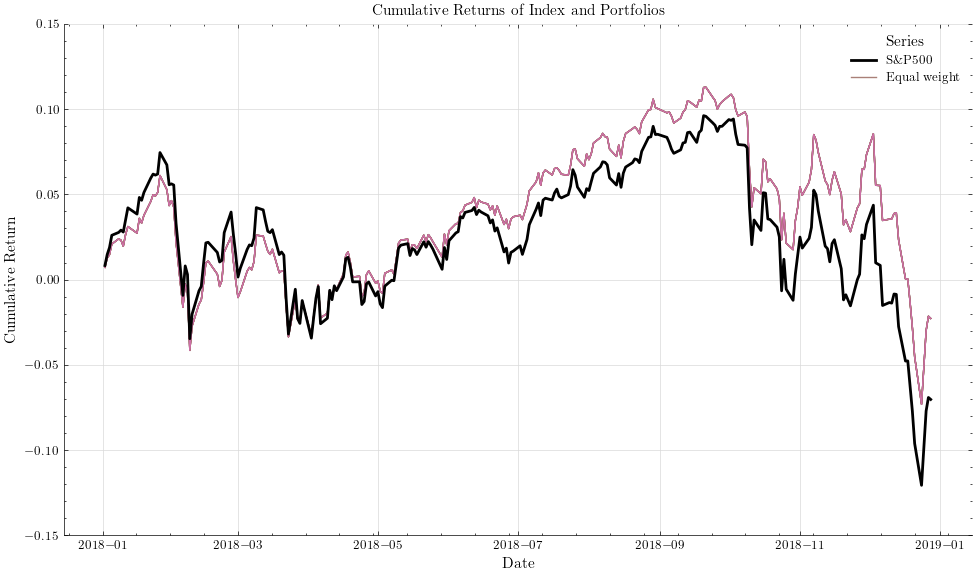

In [18]:
from returns_analysis import ReturnAnalyzer

an = ReturnAnalyzer(sp500ret, weighted_portfolio_returns,weighted_portfolio_excess, equal_weight=True)
latex = an.generate_apa_latex_table()   # -> copy into your LaTeX doc
fig   = an.plot_returns()               # -> save/show as needed

In [ ]:
latex

# DM test

c4f: 817788886064538782 (base),282669454988538500 (en)

In [ ]:
!pwd

In [ ]:
rf_c4f_result = dm_test.compare_experiments_dm_test(
    df_dict,  # This is your actual_lst (renamed in the function)
    experiment1_num=817788886064538782, 
    experiment2_num=282669454988538500
)

In [ ]:
rf_c4f_result

In [ ]:
rf_ff5_result = dm_test.compare_experiments_dm_test(
    df_dict,  # This is your actual_lst (renamed in the function)
    experiment1_num=311565507127226983, 
    experiment2_num=378770976445258889
)

In [ ]:
rf_ff5_result

In [ ]:
ols_rf_base_c4f_result = dm_test.compare_experiments_dm_test(
    df_dict,  # This is your actual_lst (renamed in the function)
    experiment1_num=468973451922201767, 
    experiment2_num=817788886064538782
)



In [ ]:
ols_rf_base_result

In [ ]:
ols_rf_ff5_base_result = dm_test.compare_experiments_dm_test(
    df_dict,  # This is your actual_lst (renamed in the function)
    experiment1_num=816231025914231740, 
    experiment2_num=311565507127226983
)


In [ ]:
ols_rf_ff5_base_result

In [ ]:
ols_rf_c4f_en_result = dm_test.compare_experiments_dm_test(
    df_dict,  # This is your actual_lst (renamed in the function)
    experiment1_num=882624347748292247, 
    experiment2_num=282669454988538500
)


ols_rf_c4f_en_result


In [ ]:
ols_rf_c4f_en_result

In [ ]:
ols_rf_ff5_en_result = dm_test.compare_experiments_dm_test(
    df_dict,  # This is your actual_lst (renamed in the function)
    experiment1_num=816231025914231740, 
    experiment2_num=378770976445258889
)


ols_rf_ff5_en_result


# pseudo beta

In [ ]:
# base c4f
tables = generate_rfi_latex_table(
    experiment_number='693575193379433193',
    output_file='rfi_c4fbase_tables.tex'
)

In [ ]:
# base ff5
tables = generate_rfi_latex_table(
    experiment_number='954270706564967595',
    output_file='rfi_ff5base_tables.tex'
)

In [ ]:
# enhacede c4f
tables = generate_rfi_latex_table(
    experiment_number='308906215627740378',
    output_file='rfi_c4fen_tables.tex'
)

In [ ]:
# enhacede c4f
tables = generate_rfi_latex_table(
    experiment_number='916756482331913684',
    output_file='rfi_ff5en_tables.tex'
)